In [19]:
# This is the import cell
import sys
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import matplotlib.ticker as ticker
from collections import OrderedDict
from scipy import stats
from PIL import Image
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import pylab as plot
first = True
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 10)



# Here are my rc parameters for matplotlibf
fsize = 20
mpl.rc('font', serif='Helvetica Neue')
#mpl.rc('font', serif='Times New Roman')
mpl.rcParams.update({'font.size': fsize})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 500
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['axes.linewidth'] = 1.5
# Set x tick params
mpl.rcParams['xtick.major.size'] = 4.5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.minor.size'] = 3.
mpl.rcParams['xtick.minor.width'] = 1.25
# Set y tick params
mpl.rcParams['ytick.major.size'] = 4.5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['ytick.minor.size'] = 3.
mpl.rcParams['ytick.minor.width'] = 1.25
mpl.rcParams['legend.fontsize']= 20.
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams["font.family"] = "Times New Roman"
# Load LaTeX and amsmath
# mpl.rc('text', usetex=True)
# mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [20]:
# Get the current path
if first:
    parent = os.getcwd()
print(parent)
# Grab file names from data folder
dens = os.listdir('../../../../../../../../Volumes/External/txt_files/all_txt_files/radial')
try:
    dens.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
    
# Grab the MCS data
pres2 = os.listdir('../../../../../../../../Volumes/External/txt_files/all_txt_files/BubComp2')
try:
    pres2.remove('.DS_Store')
except:
    print(".DS_Store not in directory")

# Grab the MCS data
pres3 = os.listdir('../../../../../../../../Volumes/External/txt_files/all_txt_files/PhaseComp2')
try:
    pres3.remove('.DS_Store')
except:
    print(".DS_Store not in directory")

/Users/nicklauersdorf/klotsa/ABPs/post_proc/Jupyter
.DS_Store not in directory
.DS_Store not in directory
.DS_Store not in directory


In [21]:
# Some functions to get the relevant data from the filenames
def checkFile(fname, string):
    for i in range(len(fname)):
        if fname[i] == string[0]:
#             print"{} matches {}".format(fname[i], string[0])
            for j in range(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
#                     print"{} matches {}".format(fname[i+j], string[j])
                    if j == (len(string) - 1):
#                         print"Final match!"
                        return True
                else:
                    break
    return False
    
def txtValue(fname, string):
    out = ""
    index = 0
    for i in range(len(fname)):
        if fname[i] == string[0]:
            for j in range(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
                    if j == (len(string) - 1):
                        # Last index of search string
                        index = i + j
                else:
                    break
                        
    # First index of value
    index += 1
    mybool = True
    while mybool:
        if fname[index].isdigit():
            out = out + fname[index]
            index += 1
        elif fname[index] == ".":    
            if fname[index+1].isdigit():
                out = out + fname[index]
                index += 1
            else:
                mybool = False
        else:
            mybool = False
    return float(out)

# Sorting functions
def multiSort(arr1, arr2, arr3, arr4):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for PeR, PeS, xS in this case
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    cpy4 = np.copy(arr4)
    ind = np.arange(0, len(arr1))
    for i in range(len(cpy1)):
        for j in range(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            # If first variable is equal, resort to second variable
            elif cpy1[i] == cpy1[j] and cpy2[i] > cpy2[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] > cpy3[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] == cpy3[j] and cpy4[i] > cpy4[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in range(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [22]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in dens:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 
                
# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(dens, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_dens = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/all_txt_files/radial')
for i in dens:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_dens.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_dens[0])

,tauB,sizeBin,clust_size,interface_id,bub_id,r_min,r_max,align,alignA,alignB,num_dens,num_densA,num_densB,press,pressA,pressB
0,0.0,5.016308,4,2,0,0.000000,3.045615,-0.187748,-0.187748,NaN,1.338334,1.338334,0.000000,0.000000,0.0,0.000000
1,0.0,5.016308,4,2,0,3.045615,6.091230,0.106669,0.106669,NaN,1.429845,1.429845,0.000000,0.000000,0.0,0.000000
2,0.0,5.016308,4,2,0,6.091230,9.136846,-0.001591,-0.001591,NaN,1.475600,1.475600,0.000000,0.000000,0.0,0.000000
3,0.0,5.016308,4,2,0,9.136846,12.182461,-0.036186,-0.036186,NaN,1.455990,1.455990,0.000000,0.000000,0.0,0.000000
4,0.0,5.016308,4,2,0,12.182461,15.228076,-0.016714,-0.016714,NaN,1.487038,1.487038,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83953,199.8,5.016308,75,3,0,112.687764,115.733379,0.045804,0.071351,0.020731,0.489579,0.242502,0.247077,1.024447,0.0,1.024447
83954,199.8,5.016308,75,3,0,115.733379,118.778994,0.012749,0.004306,0.020042,0.505831,0.234420,0.271410,1.087897,0.0,1.087897
83955,199.8,5.016308,75,3,0,118.778994,121.824610,0.036924,0.034478,0.039021,0.504319,0.232829,0.271489,2.118783,0.0,2.118783
83956,199.8,5.016308,75,3,0,121.824610,124.870225,0.002864,-0.002821,0.007747,0.518981,0.239790,0.279190,0.432588,0.0,0.432588


In [23]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params = pd.DataFrame(columns=headers)
for i in range(0, len(all_dens)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params = params.append(df, ignore_index = True)
display(params)

,pe,peA,peB,xA,eps,phi,tauPer_dt
0,0,0,200,50.0,1.0,60.0,0.000001
1,0,0,250,50.0,1.0,60.0,0.000001
2,0,0,350,50.0,1.0,60.0,0.000001
3,0,0,450,50.0,1.0,60.0,0.000001
4,0,50,350,50.0,1.0,60.0,0.000001
...,...,...,...,...,...,...,...
104,0,450,0,50.0,1.0,60.0,0.000001
105,0,450,100,50.0,1.0,60.0,0.000001
106,0,450,200,50.0,1.0,60.0,0.000001
107,0,450,450,50.0,1.0,60.0,0.000001


In [24]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_dens)):
    # Ger rid of NaN in favor of 0
    all_dens[i].fillna(0, inplace=True)

headers=list(all_dens[0])
display(all_dens[0])
print(all_dens[0][headers[1]][0])
print(all_dens[0][headers[2]][0])

,tauB,sizeBin,clust_size,interface_id,bub_id,r_min,r_max,align,alignA,alignB,num_dens,num_densA,num_densB,press,pressA,pressB
0,0.0,5.016308,4,2,0,0.000000,3.045615,-0.187748,-0.187748,0.000000,1.338334,1.338334,0.000000,0.000000,0.0,0.000000
1,0.0,5.016308,4,2,0,3.045615,6.091230,0.106669,0.106669,0.000000,1.429845,1.429845,0.000000,0.000000,0.0,0.000000
2,0.0,5.016308,4,2,0,6.091230,9.136846,-0.001591,-0.001591,0.000000,1.475600,1.475600,0.000000,0.000000,0.0,0.000000
3,0.0,5.016308,4,2,0,9.136846,12.182461,-0.036186,-0.036186,0.000000,1.455990,1.455990,0.000000,0.000000,0.0,0.000000
4,0.0,5.016308,4,2,0,12.182461,15.228076,-0.016714,-0.016714,0.000000,1.487038,1.487038,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83953,199.8,5.016308,75,3,0,112.687764,115.733379,0.045804,0.071351,0.020731,0.489579,0.242502,0.247077,1.024447,0.0,1.024447
83954,199.8,5.016308,75,3,0,115.733379,118.778994,0.012749,0.004306,0.020042,0.505831,0.234420,0.271410,1.087897,0.0,1.087897
83955,199.8,5.016308,75,3,0,118.778994,121.824610,0.036924,0.034478,0.039021,0.504319,0.232829,0.271489,2.118783,0.0,2.118783
83956,199.8,5.016308,75,3,0,121.824610,124.870225,0.002864,-0.002821,0.007747,0.518981,0.239790,0.279190,0.432588,0.0,0.432588


5.016308
4


In [25]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres2:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres2, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_new = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/all_txt_files/BubComp2')
for i in pres2:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_new.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_new[-1])
print(storeVals)

,tauB,sizeBin,clust_size,int_id,bub_id,Na,Nb,radius,radius_err,sa_ext,sa_int,edge_width,edge_width_err,edge_begin,edge_end,NBin
0,0.0,5.016308,42651,1,1,6647,18354,94.161009,1.216715,611.180966,399.659987,32.266163,1.788011,61.894846,94.161009,753
1,0.1,5.016308,42696,1,1,6380,18145,91.591220,2.384943,594.909385,433.342241,30.377556,3.324280,61.213664,91.591220,701
2,0.1,5.016308,42696,1,4,369,0,5.302671,2.221200,40.523849,0.000000,0.000000,0.000000,0.000000,0.000000,11
3,0.1,5.016308,42696,1,5,369,0,4.642710,1.422925,37.589696,0.000000,0.000000,0.000000,0.000000,0.000000,11
4,0.2,5.016308,42807,1,1,5362,18450,97.859355,32.741957,607.415514,83.439809,89.119730,33.289572,8.739625,97.859355,703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,199.5,5.016308,31828,1,1,11813,8606,83.746766,15.861620,595.269030,384.665330,30.643629,6.483743,53.103138,83.746766,636
2236,199.6,5.016308,31693,1,1,12023,8621,84.022612,17.768463,594.599746,370.996107,32.486913,9.187860,51.535699,84.022612,635
2237,199.6,5.016308,31693,1,2,35,151,7.163674,1.207087,48.576151,0.000000,0.000000,0.000000,0.000000,0.000000,16
2238,199.7,5.016308,31530,2,2,11595,8327,83.493161,16.110552,599.929397,378.423927,30.406892,6.823248,53.086269,83.493161,624


[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 20

In [26]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params3 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_new)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params3 = params3.append(df, ignore_index = True)
display(params3)

,pe,peA,peB,xA,eps,phi,tauPer_dt
0,0,0,200,50.0,1.0,60.0,0.000001
1,0,0,250,50.0,1.0,60.0,0.000001
2,0,0,350,50.0,1.0,60.0,0.000001
3,0,0,450,50.0,1.0,60.0,0.000001
4,0,50,350,50.0,1.0,60.0,0.000001
...,...,...,...,...,...,...,...
104,0,450,450,50.0,1.0,60.0,0.000001
105,0,450,450,50.0,1.0,60.0,0.000001
106,0,450,50,50.0,1.0,60.0,0.000001
107,0,450,0,50.0,1.0,60.0,0.000001


In [27]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_new)):
    # Ger rid of NaN in favor of 0
    all_pres_new[i].fillna(0, inplace=True)

headers=list(all_pres_new[0])
display(all_pres_new[0])
print(all_pres_new[0][headers[1]][0])
print(all_pres_new[0][headers[2]][0])

,tauB,sizeBin,clust_size,int_id,bub_id,Na,Nb,radius,radius_err,sa_ext,sa_int,edge_width,edge_width_err,edge_begin,edge_end,NBin
0,0.0,5.016308,28099,2,2,9027,5785,86.218605,2.551449,566.002157,418.600835,23.901379,4.373878,62.317226,86.218605,567
1,0.1,5.016308,28929,1,1,7852,5657,84.067983,2.676787,596.115110,403.342331,21.517395,2.760762,62.550588,84.067983,524
2,0.2,5.016308,29941,1,1,7579,7363,88.756423,3.102743,617.403904,399.559683,26.929242,3.239495,61.827182,88.756423,638
3,0.3,5.016308,30913,1,1,7021,8289,88.878930,5.133081,633.238223,399.668279,27.042091,5.420300,61.836839,88.878930,641
4,0.4,5.016308,31789,1,1,6391,8626,86.769166,5.375895,634.991305,403.383937,24.482083,5.756743,62.287083,86.769166,575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3045,199.4,5.016308,26063,2,3,42,66,3.752094,1.404111,35.085886,0.000000,0.000000,0.000000,0.000000,0.000000,10
3046,199.5,5.016308,25887,2,2,2914,11525,75.962884,8.133624,549.784054,372.148288,22.821240,12.627990,53.290843,75.962884,482
3047,199.6,5.016308,26207,1,1,2728,11253,74.939718,6.961902,524.270605,366.977504,21.727100,11.687968,53.308468,74.939718,457
3048,199.7,5.016308,26192,1,1,2734,11217,75.352481,7.165606,523.211632,372.679724,21.496875,5.240507,53.855606,75.352481,457


5.016308
28099


In [28]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres3:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres3, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_new2 = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/all_txt_files/PhaseComp2')
for i in pres3:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_new2.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_new2[-1])
print(storeVals)

,tauB,sizeBin,clust_size,Na_bulk,Nb_bulk,NBin_bulk,Na_gas,Nb_gas,NBin_gas,Na_int,Nb_int,NBin_int,Na_bub,Nb_bub,NBin_bub
0,0.0,5.016308,45357,17031,0,373,0,4285,1429,7942,20742,799,0,0,0


[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 20

In [29]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params4 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_new2)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params4 = params4.append(df, ignore_index = True)
display(params4)

,pe,peA,peB,xA,eps,phi,tauPer_dt
0,0,0,200,50.0,1.0,60.0,0.000001
1,0,0,250,50.0,1.0,60.0,0.000001
2,0,0,350,50.0,1.0,60.0,0.000001
3,0,0,450,50.0,1.0,60.0,0.000001
4,0,50,350,50.0,1.0,60.0,0.000001
...,...,...,...,...,...,...,...
104,0,450,350,50.0,1.0,60.0,0.000001
105,0,450,450,50.0,1.0,60.0,0.000001
106,0,450,50,50.0,1.0,60.0,0.000001
107,0,450,450,50.0,1.0,60.0,0.000001


In [30]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_new2)):
    # Ger rid of NaN in favor of 0
    all_pres_new2[i].fillna(0, inplace=True)

headers=list(all_pres_new2[0])
display(all_pres_new2[0])
print(all_pres_new2[0][headers[1]][0])
print(all_pres_new2[0][headers[2]][0])

,tauB,sizeBin,clust_size,Na_bulk,Nb_bulk,NBin_bulk,Na_gas,Nb_gas,NBin_gas,Na_int,Nb_int,NBin_int,Na_bub,Nb_bub,NBin_bub
0,0.0,5.016308,28099,15946,0,434,0,19242,1600,9027,5785,567,0,0,0
1,0.1,5.016308,28929,17121,0,442,0,19370,1635,7852,5657,524,0,0,0
2,0.2,5.016308,29941,17394,0,431,0,17664,1532,7579,7363,638,0,0,0
3,0.3,5.016308,30913,17952,0,431,0,16738,1529,7021,8289,641,0,0,0
4,0.4,5.016308,31789,18582,0,437,0,16401,1589,6391,8626,575,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,199.4,5.016308,26063,11205,1221,292,10380,11703,1763,3146,11838,503,242,265,43
1995,199.5,5.016308,25887,11414,1437,302,10645,12065,1817,2914,11525,482,0,0,0
1996,199.6,5.016308,26207,11473,1563,307,10772,12211,1837,2728,11253,457,0,0,0
1997,199.7,5.016308,26192,11528,1745,313,10711,12065,1831,2734,11217,457,0,0,0


5.016308
28099


In [31]:
# All data is loaded, now compute analytical aspects
r_cut = (2.**(1./6.))

# Get lattice spacing for particle size
def ljForce(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / sigma) * ((2*(div**13)) - (div)**7)
    return dU

# # Lennard-Jones pressure
# def ljPress(r, eps, sigma=1.):
#     phiCP = np.pi / (2. * np.sqrt(3.))
#     div = (sigma/r)
#     dU = (24. * eps / r) * ((2.*(div**12.)) - (div)**6.)
#     # This is just pressure divided by the area of a particle
# #     return (12. * dU / (np.pi * r))
#     return (12. * dU / (np.pi * r * phiCP))

def ljPress(r, pe, eps, sigma=1.):
    phiCP = np.pi / (2. * np.sqrt(3.))
    # This is off by a factor of 1.2...
    ljF = avgCollisionForce(pe)
    return (2. *np.sqrt(3) * ljF / r)
    
def avgCollisionForce(pe, power=1.):
    '''Computed from the integral of possible angles'''
    peCritical = 40.
    if pe < peCritical:
        pe = 0
    else:
        pe -= peCritical
    magnitude = 6.
    # A vector sum of the six nearest neighbors
    magnitude = np.sqrt(28)
#     return (magnitude * (pe**power)) / (np.pi)
#     return (pe * (1. + (8./(np.pi**2.))))
    coeff = 1.92#2.03#3.5#2.03
    #coeff= 0.4053
    return (pe * coeff)

def fStar(pe, epsilon, sigma=1.):
    out = (avgCollisionForce(pe) * sigma) / (24.*epsilon)
    return out
    
def conForRClust(pe, eps):
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(pe):
            r -= j
        r += j
    out = r
    return out

def nonDimFLJ(r, sigma=1.):
    div = (sigma/r)
    dU = ((2*(div**13)) - (div)**7)
    return dU

def latForFStar(fstar):
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while nonDimFLJ(r) < fstar:
            r -= j
        r += j
    out = r
    return out
    
def latToPhi(latIn):
    '''Read in lattice spacing, output phi'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    return phiCP / (latIn**2)

# From area fraction, get lattice spacing
def phiToLat(phiIn):
    '''Read in phi, output the lattice spacing'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    latCP = 1.
    return np.sqrt(phiCP / phiIn)
    
def compPhiG(pe, a, kap=4.5, sig=1.):
    num = 3. * (np.pi**2) * kap * sig
    den = 4. * pe * a
    return num / den
    
def clustFrac(phi, phiG, a, sig=1.):
    phiL = latToPhi(a)
    ApL = np.pi * (sig**2) / 4.
    Ap = np.pi * (sig**2) / 4.
    num = (phiL*phiG) - (phiL*phi)
    den = (phi*phiG) - (phi*phiL)
    ans = num / den
    return ans

def radCurve(area):
    # From area of circle get curvature
    return np.sqrt(area/np.pi)

def radCirc(circ):
    return circ / (2. * np.pi)

In [32]:
# Let's use analytical theory and kinetic theory to get cluster radius
epsRange = [1., 0.1, 0.01, 0.001, 0.0001]
# epsRange = [0.0001, 0.001, 0.01, 0.1, 1.]
peRange = np.arange(0., 700., 1.)
phiRange = [0.45, 0.55, 0.65]
N = 100000.
norm = 10.**0.
# norm = 1.

phiCP = np.pi / (2. * np.sqrt(3))
lat = []
pColl = []
pLJ = []
cfs = []
Rls = []
peCrit = []
phiGs = []
phiCPs = []
a_box = []
l_box = []
for b in range(0, len(phiRange)):
    lat.append([])
    phiCPs.append([])
    pColl.append([])
    pLJ.append([])
    cfs.append([])
    Rls.append([])
    phiGs.append([])
    peCrit.append([])
    a_box.append(N * np.pi * 0.25 / phiRange[b])
    l_box.append(np.sqrt(a_box[-1]))
    for i in range(0, len(epsRange)):
        lat[b].append([])
        phiCPs[b].append([])
        pColl[b].append([])
        pLJ[b].append([])
        cfs[b].append([])
        Rls[b].append([])
        phiGs[b].append([])
        for j in range(0, len(peRange)):
            # Compute lattice spacing
        
            lat[b][i].append(conForRClust(peRange[j], epsRange[i]))
            phiCPs[b][i].append(latToPhi(lat[b][i][-1]))
            # Compute pressure
            #curPLJ = ljPress(lat[b][i][-1], epsRange[i]) / (np.pi * (lat[b][i][-1]**2) * 0.25 * phiCP)
            #curPLJ = ljPress(lat[b][i][-1], epsRange[i]) / (np.pi * (lat[b][i][-1]**2) * 0.25 * phiCP * (lat[b][i][-1]**(0.5)) * 1.25)
            curPLJ = ljPress(lat[b][i][-1], peRange[j], epsRange[i])
            
            # Append to list
            pLJ[b][i].append(curPLJ/(norm))

            # Compute cluster fraction
            phiG = compPhiG(peRange[j], lat[b][i][-1])
            phiGs[b][i].append(phiG)
            if peRange[j] > 35.:
                cf = clustFrac(phiRange[b], phiG, lat[b][i][-1])
                if cf < 0. or cf > 1.:
                    cf = 0.
            else:
                cf = 0
            cfs[b][i].append(cf)

            # Get the critical activity
            if j > 0:
                if cfs[b][i][-2] == 0. and cfs[b][i][-1] > 0.:
                    peCrit[b].append(peRange[j])

            # Get the radius (for some N)
            Nl = cfs[b][i][-1] * N
            Al = Nl * ((np.pi * (lat[b][i][-1]**2))/(4*phiCP))
            Rl = np.sqrt(Al / (np.pi))
            Rls[b][i].append(Rl)

<ipython-input-31-5f46f5e34eab>:86: RuntimeWarning: divide by zero encountered in double_scalars
  return num / den


In [15]:
align_peA=np.array([])
align_peB=np.array([])
align_peNet=np.array([])
first_align_peNet=np.array([])
first_interpart_peNet=np.array([])
first_interpart_peA=np.array([])
first_interpart_peB=np.array([])

align_xA=np.array([])
align_eps=np.array([])
align_pnum=np.array([])
align_phi=np.array([])
align_press_arr = np.array([])
first_align_press = np.array([])
first_bulk_press = np.array([])
first_align_peA=np.array([])
first_align_peB=np.array([])

width_peA=np.array([])
width_peB=np.array([])
width_peNet=np.array([])
width_xA=np.array([])
width_eps=np.array([])
width_pnum=np.array([])
width_phi=np.array([])

interpart_peA=np.array([])
interpart_peB=np.array([])
interpart_peNet=np.array([])
interpart_xA=np.array([])
interpart_eps=np.array([])
interpart_pnum=np.array([])
interpart_phi=np.array([])
interpart_press=np.array([])
interpart_press_expand=np.array([])
avg_shear=np.array([])
fastCol = '#e31a1c'
slowCol = '#081d58'

avg_rad = np.array([])
avg_width = np.array([])
avg_clust = np.array([])
avg_circularity = np.array([])

bulk_lat_time_mean = np.array([])
int_lat_time_mean = np.array([])
all_lat_time_mean = np.array([])
bulk_lat_time_std = np.array([])
int_lat_time_std = np.array([])
all_lat_time_std = np.array([])
from scipy.optimize import curve_fit


avg_bulk_nA = np.array([])
avg_bulk_nB = np.array([])
avg_bulk_n = np.array([])
avg_dense_nA = np.array([])
avg_dense_nB = np.array([])
avg_dense_n = np.array([])
avg_int_n = np.array([])
avg_int_nA = np.array([])
avg_int_nB = np.array([])
avg_gas_nA = np.array([])
avg_gas_nB = np.array([])
avg_gas_n = np.array([])

align_type = np.array([])
interpart_type = np.array([])

width_type = np.array([])

radius_arr_final = np.linspace(0,1.4,num=30)
num_dens_arr_final = np.zeros(30)
align_arr_final = np.zeros(30)
press_arr_final = np.zeros(30)
final_count = np.zeros(30)
final_count_count = np.zeros(30)

avg_int_theory_arr = np.array([])
avg_bulk_theory_arr = np.array([])
def ljForce(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / sigma) * ((2*(div**13)) - (div)**7)
    return dU

def avgCollisionForce(pe, power=1.):
    '''Computed from the integral of possible angles'''
    peCritical = 40.
    if pe < peCritical:
        pe = 0
    else:
        pe -= peCritical
    magnitude = 6.
    # A vector sum of the six nearest neighbors
    magnitude = np.sqrt(28)
#     return (magnitude * (pe**power)) / (np.pi)
#     return (pe * (1. + (8./(np.pi**2.))))
    coeff = 1.92#3.0#1.92#2.03#3.5#2.03
    #coeff= 0.4053
    return (pe * coeff)

def conForRClust(pe, eps):
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(pe):
            r -= j
        r += j
    out = r
    return out
def densProbability(r, activity_net, activity_slow):
    "Using similar triangles to find sides"
    gas_dense_dif_phi = 0.866 * np.log10(activity_net - 46.993) - 0.443
    rate_decay = -6.151 * np.log10(activity_net-49.921) - 4.392
    mid_point = 0.044 * np.log10(activity_slow-49.893) + 0.836
    gas_phi = -0.26 * np.log10(activity_slow-41.742)+0.783
    
    num_dens_r = ((gas_dense_dif_phi / (1+np.exp(-rate_decay * (r-mid_point)))) + gas_phi)
    
    return num_dens_r

def alignProbability(r, activity_net, activity_slow):
    "Using similar triangles to find sides"
    max_align = 0.2019 * np.log10(activity_net - 41.2803) - 0.1885
    mid_point = 0.0492 * np.log10(activity_slow - 47.0061) + 0.8220
    std_dev = 0.1057
    align_r = max_align * np.exp(-(r-mid_point)**2/(2*std_dev**2))
    
    return align_r
A_mean = np.array([])
B_mean = np.array([])
A_avg_time_arr = np.array([])
B_avg_time_arr = np.array([])
A_std = np.array([])
B_std = np.array([])
pe_int_mean = np.array([])
pe_gas_mean = np.array([])
pe_bulk_mean = np.array([])
pe_dense_mean = np.array([])
peA_arr = np.array([])
peB_arr = np.array([])
alpha_max_mean = np.array([])
int_width_mean = np.array([])
typ_arr = np.array([])
for i in range(0, len(all_dens)):
    if (params['peA'][i]>0) & (params['peB'][i]>0):
        print('test1')
        print(dens[i][0:4])
        if (dens[i][0:4]=='rand') | (dens[i][0:4]=='fast'):
            print('test2')
            print(dens[i][0:4])
            print(params['peA'][i])
            print(params['peB'][i])
            if all_dens[i].empty:
                continue

            for l in range(0, len(all_pres_new)):
                if all_pres_new[l].empty:
                    continue
                if params3['peA'][l]==params['peA'][i]:
                    if params3['peB'][l]==params['peB'][i]:
                        if (pres2[l][0:4]==dens[i][0:4]):

                        #if pres2[k][0:4]==dens[i][0:4]:

                            for q in range(0, len(all_pres_new2)):

                                if all_pres_new2[q].empty:
                                    continue
                                #if pres3[q][0:4]==dens[i][0:4]:
                                if params4['peA'][q]==params['peA'][i]:
                                    if params4['peB'][q]==params['peB'][i]:
                                        if (pres3[q][0:4]==dens[i][0:4]):
                                            A_arr = np.array([])
                                            B_arr = np.array([])
                                            A_arr2 = np.array([])
                                            B_arr2 = np.array([])

                                            time_i = all_dens[i]['tauB']
                                            time_l = all_pres_new[l]['tauB']
                                            time_q = all_pres_new2[q]['tauB']

                                            #Instantiate arrays for reading in number density .txt file
                                            bulk_nA_arr = np.array([])
                                            bulk_nB_arr = np.array([])
                                            bulk_n_arr = np.array([])
                                            int_n_arr = np.array([])
                                            int_nA_arr = np.array([])
                                            int_nB_arr = np.array([])
                                            gas_nA_arr = np.array([])
                                            gas_n_arr = np.array([])
                                            gas_nB_arr = np.array([])
                                            dense_nA_arr = np.array([])
                                            dense_nB_arr = np.array([])
                                            dense_n_arr = np.array([])

                                            #Instantiate arrays for reading in lattice spacing .txt file
                                            bulk_lat_mean = np.array([])
                                            int_lat_mean = np.array([])
                                            all_lat_mean = np.array([])
                                            bulk_lat_std = np.array([])
                                            int_lat_std = np.array([])
                                            all_lat_std = np.array([])

                                            rat_edge_arr = 0
                                            rat_edge_val = 0

                                            time_dens = np.array([])
                                            time_arr = np.array([])
                                            radius_arr = np.array([])
                                            align_arr = np.array([])
                                            num_dens_arr = np.array([])
                                            press_arr = np.array([])
                                            align_max_arr = np.array([])
                                            int_width_arr = np.array([])
                                            time_align_arr = np.array([])





                                            #Loop over time in interface pressure .txt file
                                            for j in range(0, len(time_i)):



                                                #Current time in loop
                                                time = time_i[j]
                                                if time>(0):


                                                    #Read values and set variables from number density .txt files
                                                    time_id_q = np.where(time_q==time)[0]
                                                    if len(time_id_q)>0:
                                                        time_id = np.where(time_i==time)[0]
                                                        time_id2 = np.where(time_l==time)[0]
                                                        if len(time_id2)>0:

                                                            if len(time_id2)==1:
                                                                edge_width = all_pres_new[l]['radius'][time_id2[0]]
                                                                edge_width2 = all_pres_new[l]['edge_width'][time_id2[0]]
                                                                nB = all_pres_new[l]['Nb'][time_id2[0]]
                                                                nA = all_pres_new[l]['Na'][time_id2[0]]
                                                                rat_edge = (edge_width - edge_width2) / edge_width
                                                                rat_edge_arr+= rat_edge
                                                                rat_edge_val += 1

                                                            elif len(time_id2)>1:
                                                                edge_width = np.max(all_pres_new[l]['radius'][time_id2])
                                                                edge_width2 = np.max(all_pres_new[l]['edge_width'][time_id2[0]])
                                                                rat_edge = (edge_width - edge_width2) / edge_width
                                                                rat_edge_arr+= rat_edge
                                                                rat_edge_val += 1

                                                                nB = np.max(all_pres_new[l]['Nb'][time_id2])
                                                                nA = np.max(all_pres_new[l]['Na'][time_id2])
                                                            if time not in time_arr:
                                                                time_arr = np.append(time_arr, time)  

                                                                bin_size = all_pres_new2[q]['sizeBin'][time_id_q]
                                                                bin_area = bin_size**2
                                                                bulk_nA_arr = np.append(bulk_nA_arr, all_pres_new2[q]['Na_bulk'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_bulk'][time_id_q]))
                                                                bulk_nB_arr = np.append(bulk_nB_arr, all_pres_new2[q]['Nb_bulk'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_bulk'][time_id_q]))
                                                                bulk_n_arr = np.append(bulk_n_arr, (all_pres_new2[q]['Nb_bulk'][time_id_q]+all_pres_new2[q]['Na_bulk'][time_id_q]) / (bin_area * all_pres_new2[q]['NBin_bulk'][time_id_q]))
                                                                int_n_arr = np.append(int_n_arr, (all_pres_new2[q]['Na_int'][time_id_q]+all_pres_new2[q]['Nb_int'][time_id_q]) / (bin_area * all_pres_new2[q]['NBin_int'][time_id_q]))
                                                                int_nA_arr = np.append(int_nA_arr, all_pres_new2[q]['Na_int'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_int'][time_id_q]))
                                                                int_nB_arr = np.append(int_nB_arr, all_pres_new2[q]['Nb_int'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_int'][time_id_q]))
                                                                gas_n_arr = np.append(gas_n_arr, (all_pres_new2[q]['Na_gas'][time_id_q] + all_pres_new2[q]['Nb_gas'][time_id_q]) / (bin_area * all_pres_new2[q]['NBin_gas'][time_id_q]))
                                                                gas_nA_arr = np.append(gas_nA_arr, all_pres_new2[q]['Na_gas'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_gas'][time_id_q]))
                                                                gas_nB_arr = np.append(gas_nB_arr, all_pres_new2[q]['Nb_gas'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_gas'][time_id_q]))
                                                                dense_n_arr = np.append(dense_n_arr, (all_pres_new2[q]['Na_int'][time_id_q]+all_pres_new2[q]['Nb_int'][time_id_q]+all_pres_new2[q]['Na_bulk'][time_id_q]+all_pres_new2[q]['Nb_bulk'][time_id_q]) / (bin_area * (all_pres_new2[q]['NBin_int'][time_id_q]+all_pres_new2[q]['NBin_bulk'][time_id_q])))
                                                                dense_nA_arr = np.append(dense_nA_arr, (all_pres_new2[q]['Na_int'][time_id_q]+all_pres_new2[q]['Na_bulk'][time_id_q]) / (bin_area * (all_pres_new2[q]['NBin_int'][time_id_q]+all_pres_new2[q]['NBin_bulk'][time_id_q])))
                                                                dense_nB_arr = np.append(dense_nB_arr, (all_pres_new2[q]['Nb_int'][time_id_q]+all_pres_new2[q]['Nb_bulk'][time_id_q]) / (bin_area * (all_pres_new2[q]['NBin_int'][time_id_q]+all_pres_new2[q]['NBin_bulk'][time_id_q])))

                                                                if len(time_arr)>=2:


                                                                    if len(radius_arr)>0:
                                                                        if np.max(radius_arr)<edge_width:
                                                                            num_dens_arr_temp = np.zeros(30)
                                                                            align_arr_temp = np.zeros(30)
                                                                            press_arr_temp = np.zeros(30)

                                                                            for k in range(0, len(radius_arr_final)-1):
                                                                                rad_where = np.where((radius_arr_final[k]<=radius_arr) & (radius_arr<radius_arr_final[k+1]))[0]
                                                                                if len(rad_where)>0:
                                                                                    nonzero_align = np.where(align_arr[rad_where]!=0)[0]
                                                                                    if len(nonzero_align)>0:
                                                                                        press_arr_final[k]+=np.mean(press_arr[rad_where][nonzero_align])
                                                                                        align_arr_final[k]+=np.mean(align_arr[rad_where][nonzero_align])
                                                                                        num_dens_arr_final[k]+=np.mean(num_dens_arr[rad_where][nonzero_align])
                                                                                        final_count[k]+=1
                                                                                        final_count_count[k]+=len(rad_where)

                                                                                        press_arr_temp[k]=np.mean(press_arr[rad_where][nonzero_align])
                                                                                        align_arr_temp[k]=np.mean(align_arr[rad_where][nonzero_align])
                                                                                        num_dens_arr_temp[k]=np.mean(num_dens_arr[rad_where][nonzero_align])
                                                                                        #temp_count[k]+=1
                                                                                        #temp_count_count[k]+=len(rad_where)

                                                                            align_max_arr = np.append(align_max_arr, np.max(align_arr_temp))
                                                                            int_width_arr = np.append(int_width_arr, edge_width2)
                                                                            time_align_arr = np.append(time_align_arr, time)
                                                                            if dens[i][0:4]=='rand':
                                                                                typ_arr = np.append(typ_arr, 0)
                                                                            else:
                                                                                typ_arr = np.append(typ_arr, 1)
                                                                            fastSim = '#de2d26'
                                                                            fastTheory = '#fc9272'
                                                                            slowSim = '#3182bd'
                                                                            slowTheory = '#9ecae1'
                                                                            fsize=10

                                                                            slowTheory = '#081d58'
                                                                            fastTheory = '#e31a1c'
                                                                            press_arr_fit = press_arr_temp
                                                                            align_arr_fit = align_arr_temp
                                                                            num_dens_arr_fit = num_dens_arr_temp

                                                                            peNet_int = np.mean((int_nA_arr[-1]/int_n_arr[-1]) * float(params['peA'][i]) + (int_nB_arr[-1]/int_n_arr[-1]) * float(params['peB'][i]))
                                                                            peNet_gas = np.mean((gas_nA_arr[-1]/gas_n_arr[-1]) * float(params['peA'][i]) + (gas_nB_arr[-1]/gas_n_arr[-1]) * float(params['peB'][i]))

                                                                            #latNet_int = np.zeros(len(peNet_int))
                                                                            phi_cp = np.pi / (2*np.sqrt(3))
                                                                            #for z in range(0, len(peNet_int)):
                                                                            latNet_int = conForRClust(peNet_int-50, 1.0)

                                                                            phid_theory = (phi_cp / latNet_int**2) / (np.pi/4)


                                                                            phig_theory = (((3 * np.pi**2 * 4.5) / 4) * ((latNet_int * peNet_gas)**(-1))) / (np.pi/4)


                                                                            def Gauss4(x, A, B):
                                                                                y = (phig_theory-phid_theory)/(1+np.exp(A*(x-B)))+phid_theory
                                                                                return y
                                                                            def Gauss(x, A, B, C):
                                                                                y = A*np.exp(-(x-B)**2/(2*C**2))
                                                                                return y

                                                                            rad_max = np.where(num_dens_arr_fit!=0)[0]


                                                                            '''
                                                                            parameters, covariance = curve_fit(Gauss4, radius_arr_final[rad_max], num_dens_arr_fit[rad_max])
                                                                            parameters2, covariance2 = curve_fit(Gauss, radius_arr_final[rad_max], align_arr_fit[rad_max])
                                                                            fit_A = parameters[0]
                                                                            #fit_B = parameters[1]
                                                                            fit_B = parameters[1]

                                                                            fit_A2 = parameters2[0]
                                                                            #fit_B = parameters[1]
                                                                            fit_B2 = parameters2[1]

                                                                            A_arr = np.append(A_arr, fit_A)
                                                                            B_arr = np.append(B_arr, fit_B)

                                                                            A_arr2 = np.append(A_arr2, fit_A2)
                                                                            B_arr2 = np.append(B_arr2, fit_B2)
                                                                            '''

                                                                            radius_arr = np.append(radius_arr, all_dens[i]['r_max'][j]/edge_width)   
                                                                            align_arr = np.append(align_arr, all_dens[i]['align'][j])   
                                                                            num_dens_arr = np.append(num_dens_arr, all_dens[i]['num_dens'][j])   
                                                                            press_arr = np.append(press_arr, all_dens[i]['press'][j])  

                                                                else:
                                                                    radius_arr = np.array([])
                                                                    align_arr = np.array([])
                                                                    num_dens_arr = np.array([])
                                                                    press_arr = np.array([])
                                                                    radius_arr = np.append(radius_arr, all_dens[i]['r_max'][j]/edge_width)   
                                                                    align_arr = np.append(align_arr, all_dens[i]['align'][j])   
                                                                    num_dens_arr = np.append(num_dens_arr, all_dens[i]['num_dens'][j])   
                                                                    press_arr = np.append(press_arr, all_dens[i]['press'][j])  



                                                            else:
                                                                radius_arr = np.append(radius_arr, all_dens[i]['r_max'][j]/edge_width)   
                                                                align_arr = np.append(align_arr, all_dens[i]['align'][j])   
                                                                num_dens_arr = np.append(num_dens_arr, all_dens[i]['num_dens'][j])   
                                                                press_arr = np.append(press_arr, all_dens[i]['press'][j]) 


                                            fastSim = '#de2d26'
                                            fastTheory = '#fc9272'
                                            slowSim = '#3182bd'
                                            slowTheory = '#9ecae1'
                                            fsize=10
                                            alpha_max_mean = np.append(alpha_max_mean, np.mean(align_max_arr))
                                            int_width_mean = np.append(int_width_mean, np.mean(int_width_arr))

                                            slowTheory = '#081d58'
                                            fastTheory = '#e31a1c'
                                            nonzero = np.where(final_count>0)[0]
                                            press_arr_fit = press_arr_final[nonzero] / final_count[nonzero]
                                            align_arr_fit = align_arr_final[nonzero] / final_count[nonzero]
                                            num_dens_arr_fit = num_dens_arr_final[nonzero] / final_count[nonzero]

                                            peNet_int = np.mean((int_nA_arr/int_n_arr) * float(params['peA'][i]) + (int_nB_arr/int_n_arr) * float(params['peB'][i]))
                                            peNet_gas = np.mean((gas_nA_arr/gas_n_arr) * float(params['peA'][i]) + (gas_nB_arr/gas_n_arr) * float(params['peB'][i]))

                                            #latNet_int = np.zeros(len(peNet_int))
                                            phi_cp = np.pi / (2*np.sqrt(3))
                                            #for z in range(0, len(peNet_int)):
                                            latNet_int = conForRClust(peNet_int-50, 1.0)

                                            phid_theory = (phi_cp / latNet_int**2) / (np.pi/4)


                                            phig_theory = (((3 * np.pi**2 * 4.5) / 4) * ((latNet_int * peNet_gas)**(-1))) / (np.pi/4)
                                            print(phig_theory)
                                            print(phid_theory)
                                            print(np.mean(dense_n_arr))
                                            print(np.mean(gas_n_arr))


                                            def Gauss4(x, A, B):
                                                y = (phid_theory-phig_theory)/(1+np.exp(A*(x-B)))+phig_theory
                                                return y
                                            def Gauss(x, A, B, C):
                                                y = A*np.exp(-(x-B)**2/(2*C**2))
                                                return y

                                            rad_max = np.where(num_dens_arr_fit!=0)[0]



                                            parameters, covariance = curve_fit(Gauss4, radius_arr_final[nonzero][rad_max], num_dens_arr_fit[rad_max])
                                            parameters2, covariance2 = curve_fit(Gauss, radius_arr_final[nonzero][rad_max], align_arr_fit[rad_max])
                                            #parameters2, covariance2 = curve_fit(Gauss, radius_arr_final, num_dens_arr_temp)
                                            fit_A = parameters[0]
                                            #fit_B = parameters[1]
                                            fit_B = parameters[1]

                                            fit_A2 = parameters2[0]
                                            fit_B2 = parameters2[1]
                                            fit_C2 = parameters2[2]
                                            '''

                                            fig, ax1 = plt.subplots(figsize=(12,5))
                                            theory_max = np.max(num_dens_arr_fit[rad_max])
                                            sim_max = np.max(num_dens_arr_fit[rad_max])

                                            if sim_max >= theory_max:
                                                plot_max = sim_max+0.1
                                            else:
                                                plot_max = theory_max+0.1


                                            plot_min = 0

                                            step = np.round(np.abs(plot_max - plot_min)/6, 2)


                                            plt.plot(radius_arr_final[nonzero][rad_max], num_dens_arr_fit[rad_max],
                                                           c=slowTheory, lw=1.8*1.8, ls='--', label='Simulation')
                                            plt.plot(radius_arr_final[nonzero][rad_max], Gauss4(radius_arr_final[nonzero][rad_max], fit_A, fit_B),
                                                           c=fastTheory, lw=1.8*1.8, ls='-', label='Fit')

                                            ax1.set_xlim(0, 1.4)        
                                            # y limits


                                            ax1.set_ylim(plot_min, plot_max) 


                                            ax1.set_xlabel(r'Distance from CoM ($x=r/r_c$)', fontsize=fsize*2.8)



                                            ax1.set_ylabel(r'Number Density [$n(x)$]', fontsize=fsize*2.8)


                                            # Set all the x ticks for radial plots
                                            loc = ticker.MultipleLocator(base=0.2)
                                            ax1.xaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=0.1)
                                            ax1.xaxis.set_minor_locator(loc)


                                            # Set y ticks
                                            print(step)
                                            loc = ticker.MultipleLocator(base=step)
                                            ax1.yaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=round(step/2,3))
                                            ax1.yaxis.set_minor_locator(loc)
                                            # Left middle plot

                                            ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                            ax1.tick_params(axis='y', labelsize=fsize*2.5)
                                            plt.legend(loc='upper right')


                                            plt.tight_layout()
                                            plt.savefig('/Volumes/External/dens_fit_time2/random_fit_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                            plt.close()

                                            fig, ax1 = plt.subplots(figsize=(12,5))
                                            theory_max = np.max(align_arr_fit[rad_max])
                                            sim_max = np.max(align_arr_fit[rad_max])

                                            if sim_max >= theory_max:
                                                plot_max = sim_max+0.1
                                            else:
                                                plot_max = theory_max+0.1


                                            plot_min = 0

                                            step = np.round(np.abs(plot_max - plot_min)/6, 2)


                                            plt.plot(radius_arr_final[nonzero][rad_max], align_arr_fit[rad_max],
                                                           c=slowTheory, lw=1.8*1.8, ls='--', label='Simulation')
                                            plt.plot(radius_arr_final[nonzero][rad_max], Gauss(radius_arr_final[nonzero][rad_max], fit_A2, fit_B2, fit_C2),
                                                           c=fastTheory, lw=1.8*1.8, ls='-', label='Fit')

                                            ax1.set_xlim(0, 1.4)        
                                            # y limits


                                            ax1.set_ylim(plot_min, plot_max) 


                                            ax1.set_xlabel(r'Distance from CoM ($x=r/r_c$)', fontsize=fsize*2.8)



                                            ax1.set_ylabel(r'Alignment [$\alpha(x)$]', fontsize=fsize*2.8)


                                            # Set all the x ticks for radial plots
                                            loc = ticker.MultipleLocator(base=0.2)
                                            ax1.xaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=0.1)
                                            ax1.xaxis.set_minor_locator(loc)


                                            # Set y ticks
                                            print(step)
                                            loc = ticker.MultipleLocator(base=step)
                                            ax1.yaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=round(step/2,3))
                                            ax1.yaxis.set_minor_locator(loc)
                                            # Left middle plot

                                            ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                            ax1.tick_params(axis='y', labelsize=fsize*2.5)
                                            plt.legend(loc='upper right')


                                            plt.tight_layout()
                                            plt.savefig('/Volumes/External/align_fit_time2/random_fit_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                            plt.close()
                                            '''

                                            fig, ax1 = plt.subplots(figsize=(12,5))


                                            plot_max = 0.5


                                            plot_min = 0

                                            step = np.round(np.abs(plot_max - plot_min)/6, 2)


                                            plt.plot(time_align_arr, align_max_arr,
                                                           c=slowTheory, lw=1.8*1.8, ls='--', label='Simulation')

                                            ax1.set_xlim(0, 100)        
                                            # y limits


                                            ax1.set_ylim(plot_min, plot_max) 


                                            ax1.set_xlabel(r'Time ($\tau$)', fontsize=fsize*2.8)



                                            ax1.set_ylabel(r'Alignment Max [$\alpha_{max}(x)$]', fontsize=fsize*2.8)


                                            # Set all the x ticks for radial plots
                                            loc = ticker.MultipleLocator(base=10)
                                            ax1.xaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=5)
                                            ax1.xaxis.set_minor_locator(loc)


                                            # Set y ticks
                                            print(step)
                                            loc = ticker.MultipleLocator(base=step)
                                            ax1.yaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=round(step/2,3))
                                            ax1.yaxis.set_minor_locator(loc)
                                            # Left middle plot

                                            ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                            ax1.tick_params(axis='y', labelsize=fsize*2.5)
                                            plt.legend(loc='upper right')


                                            plt.tight_layout()
                                            if dens[i][0:4]=='rand':
                                                plt.savefig('/Volumes/External/align_fit_time2/random_alpha_max_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                            else:
                                                plt.savefig('/Volumes/External/align_fit_time2/fast_out_alpha_max_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)

                                            plt.close()

                                            fig, ax1 = plt.subplots(figsize=(12,5))


                                            plot_max = np.max(int_width_arr) + 2


                                            plot_min = np.min(int_width_arr) - 2

                                            step = np.round(np.abs(plot_max - plot_min)/6, 2)


                                            plt.plot(time_align_arr, int_width_arr,
                                                           c=slowTheory, lw=1.8*1.8, ls='--', label='Simulation')

                                            ax1.set_xlim(0, 100)        
                                            # y limits


                                            ax1.set_ylim(plot_min, plot_max) 


                                            ax1.set_xlabel(r'Time ($\tau$)', fontsize=fsize*2.8)



                                            ax1.set_ylabel(r'Interface Width [$h$]', fontsize=fsize*2.8)


                                            # Set all the x ticks for radial plots
                                            loc = ticker.MultipleLocator(base=10)
                                            ax1.xaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=5)
                                            ax1.xaxis.set_minor_locator(loc)


                                            # Set y ticks
                                            print(step)
                                            loc = ticker.MultipleLocator(base=step)
                                            ax1.yaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=round(step/2,3))
                                            ax1.yaxis.set_minor_locator(loc)
                                            # Left middle plot

                                            ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                            ax1.tick_params(axis='y', labelsize=fsize*2.5)
                                            plt.legend(loc='upper right')


                                            plt.tight_layout()
                                            if dens[i][0:4]=='rand':
                                                plt.savefig('/Volumes/External/align_fit_time2/random_int_width_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                            else:
                                                plt.savefig('/Volumes/External/align_fit_time2/fast_out_int_width_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)

                                            plt.close()



                                            '''
                                            A_avg_time_arr = np.append(A_avg_time_arr, fit_A)
                                            B_avg_time_arr = np.append(B_avg_time_arr, fit_B)



                                            fig, ax1 = plt.subplots(figsize=(12,5))
                                            plot_max = np.max(A_arr)+1


                                            plot_min = np.min(A_arr)-1
                                            print(plot_min)
                                            print(plot_max)
                                            step = np.round(np.abs(plot_max - plot_min)/6, 2)


                                            plt.plot(time_arr[1:], A_arr,
                                                           c=slowTheory, lw=1.8*1.8, ls='--')

                                            ax1.set_xlim(0, 100)        
                                            # y limits


                                            ax1.set_ylim(plot_min, plot_max) 


                                            ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                            ax1.set_ylabel(r'$B_\mathrm{n}$', fontsize=fsize*2.8)


                                            # Set all the x ticks for radial plots
                                            loc = ticker.MultipleLocator(base=20)
                                            ax1.xaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=10)
                                            ax1.xaxis.set_minor_locator(loc)


                                            # Set y ticks
                                            print(step)
                                            loc = ticker.MultipleLocator(base=step)
                                            ax1.yaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=round(step/2,3))
                                            ax1.yaxis.set_minor_locator(loc)
                                            # Left middle plot

                                            ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                            ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                            plt.tight_layout()
                                            plt.savefig('/Volumes/External/dens_fit_time2/random_fit_a_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                            plt.close()

                                            fig, ax1 = plt.subplots(figsize=(12,5))
                                            plot_max = np.max(B_arr)+0.05


                                            plot_min = np.min(B_arr)-0.05
                                            step = np.round(np.abs(plot_max - plot_min)/6,2)
                                            if step < 0:
                                                step = step * -1


                                            plt.plot(time_arr[1:], B_arr,
                                                           c=slowTheory, lw=1.8*1.8, ls='--')

                                            ax1.set_xlim(0, 100)        
                                            # y limits


                                            ax1.set_ylim(plot_min, plot_max) 


                                            ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                            ax1.set_ylabel(r'$C_\mathrm{n}$', fontsize=fsize*2.8)


                                            # Set all the x ticks for radial plots
                                            loc = ticker.MultipleLocator(base=20)
                                            ax1.xaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=10)
                                            ax1.xaxis.set_minor_locator(loc)


                                            # Set y ticks
                                            print(step)
                                            loc = ticker.MultipleLocator(base=step)
                                            ax1.yaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=round(step/2,3))
                                            ax1.yaxis.set_minor_locator(loc)
                                            # Left middle plot
                                            ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                            ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                            plt.tight_layout()
                                            plt.savefig('/Volumes/External/dens_fit_time2/random_fit_b_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                            plt.close()
                                            '''


                                            pe_int_mean = np.append(pe_int_mean, np.mean((int_nA_arr/int_n_arr) * float(params['peA'][i]) + (int_nB_arr/int_n_arr) * float(params['peB'][i])))
                                            pe_gas_mean = np.append(pe_gas_mean, np.mean((gas_nA_arr/gas_n_arr) * float(params['peA'][i]) + (gas_nB_arr/gas_n_arr) * float(params['peB'][i])))
                                            pe_bulk_mean = np.append(pe_bulk_mean, np.mean((bulk_nA_arr/bulk_n_arr) * float(params['peA'][i]) + (bulk_nB_arr/bulk_n_arr) * float(params['peB'][i])))
                                            pe_dense_mean = np.append(pe_dense_mean, np.mean((dense_nA_arr/dense_n_arr) * float(params['peA'][i]) + (dense_nB_arr/dense_n_arr) * float(params['peB'][i])))
                                            '''
                                            A_mean = np.append(A_mean, np.mean(A_arr))
                                            B_mean = np.append(B_mean, np.mean(B_arr))
                                            sum_A = 0
                                            for z in range(0, len(A_arr)):
                                                sum_A += (A_arr[z] - A_mean[-1]) ** 2
                                            A_std = np.append(A_std, (sum_A / len(A_arr))**0.5)

                                            sum_B = 0
                                            for z in range(0, len(B_arr)):
                                                sum_B += (B_arr[z] - B_mean[-1]) ** 2
                                            B_std = np.append(B_std, (sum_B / len(B_arr))**0.5)
                                            '''

                                            peA_arr = np.append(peA_arr, params['peA'][i])
                                            peB_arr = np.append(peB_arr, params['peB'][i])



test1
rand
test2
rand
50
350
0.3298515332233034
1.5870764699078428
1.435159495551005
0.4940154988954751
0.08
11.12
test1
rand
test2
rand
50
450
0.2904126519472596
1.6659729916160582
1.4922023372356
0.47700281895072205
0.08
9.75
test1
rand
test2
rand
50
50
0.7556870332224089
0.9164864219049506
0.7732111721101503
0.7311153687720668
0.08


/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/scipy/optimize/minpack.py:807: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


0.67
test1
rand
test2
rand
50
100
0.516843936905733
0.9164864219049506
1.0057660372189772
0.6172850368219542
0.08
25.88
test1
rand
test2
rand
50
150
0.4704545160407092
1.2132380243250298
1.2063369112490925
0.5577835825125396
0.08
18.31
test1
rand
test2
rand
50
200
0.42361252742872846
1.369415159472478
1.2830090092216533
0.5322089361980211
0.08
13.78
test1
rand
test2
rand
50
250
0.384909117027829
1.4669865288738315
1.3459635451733443
0.5179290189717726
0.08
11.25
test1
half
test1
half
test1
half
test1
half
test1
half
test1
half
test1
half
test1
fast
test2
fast
50
150
0.34979672243212456
1.342097945168805
1.3281546014698653
0.3067086987353569
0.08
13.53
test1
fast
test2
fast
50
200
0.2952399639247868
1.4651465588590773
1.399639884370935
0.2851835861883557
0.08
13.96
test1
fast
test2
fast
50
250
0.2695500469278426
1.5393486733563317
1.442972877077634
0.298631438729555
0.08
11.99
test1
fast
test2
fast
50
350


KeyboardInterrupt: 

In [22]:
nonzero = np.where((int_width_mean > 10) & (int_width_mean < 50))
rand_ids = np.where(typ_arr[nonzero]==0)
fast_ids = np.where(typ_arr[nonzero]==1)
print(rand_ids)
print(fast_ids)

nonzero2 = np.where((int_width_mean < 10) | (int_width_mean > 50))
print(peA_arr[nonzero2])
print(peB_arr[nonzero2])
fig, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(pe_int_mean[nonzero][rand_ids], alpha_max_mean[nonzero][rand_ids], linewidths=1.0, edgecolor='black', facecolor='green', s=120.0)
plt.scatter(pe_int_mean[nonzero][fast_ids], alpha_max_mean[nonzero][fast_ids], linewidths=1.0, edgecolor='black', facecolor='red', s=120.0)

def Gauss4(x, A, B):
    y = A*np.log10(x-45)+B
    return y

parameters, covariance = curve_fit(Gauss4, pe_int_mean[nonzero], alpha_max_mean[nonzero])

fit_A = parameters[0]
fit_B = parameters[1]
print(fit_A)
print(fit_B)
x_span = np.linspace(0, 500, num=500)

#fit_y = Gauss4(pe_int_theory, fit_A, fit_B)

loc = ticker.MultipleLocator(base=100)
ax1.xaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=50)
ax1.xaxis.set_minor_locator(loc)
plt.plot(x_span, np.log10((x_span-45))*fit_A + fit_B, color='black', linewidth=1.8*1.8, label=r'$\alpha_\mathrm{max}=$'+str(round(fit_A,2))+r'$\mathrm{log}_{10}(\mathrm{Pe}_\mathrm{Net}^\mathrm{i}-45)+$' + str(round(fit_B,2)))      

#ax1.text(0.68, 0.58, r'$\alpha(x)=\mathrm{A}_\alpha e^{-(x-\mathrm{B}_\alpha)^2/2 \mathrm{C}_\alpha^2}$', zorder=10,
#                                               transform=ax1.transAxes,
#                                               fontsize=28,fontdict={'fontname':'Helvetica'}, bbox=props)  
# Set y ticks
loc = ticker.MultipleLocator(base=0.1)
ax1.yaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=0.05)
ax1.yaxis.set_minor_locator(loc)

ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i})$', fontsize=32)
ax1.set_ylabel(r'Max Alignment ($\alpha_\mathrm{max}$)', fontsize=32)

plt.ylim(0, 0.4)
plt.legend(loc='lower right', fontsize=28)

plt.show()

nonzero = np.where((int_width_mean > 10) & (int_width_mean < 50))
nonzero2 = np.where((int_width_mean < 10) | (int_width_mean > 50))
print(peA_arr[nonzero2])
print(peB_arr[nonzero2])
fig, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(peA_arr[nonzero][rand_ids], alpha_max_mean[nonzero][rand_ids], linewidths=1.0, edgecolor='black', facecolor='green', s=120.0)
plt.scatter(peA_arr[nonzero][fast_ids], alpha_max_mean[nonzero][fast_ids], linewidths=1.0, edgecolor='black', facecolor='red', s=120.0)

def Gauss4(x, A, B):
    y = A*np.log10(x-45)+B
    return y

parameters, covariance = curve_fit(Gauss4, peA_arr[nonzero], alpha_max_mean[nonzero])

fit_A = parameters[0]
fit_B = parameters[1]
print(fit_A)
print(fit_B)
x_span = np.linspace(0, 500, num=500)

#fit_y = Gauss4(pe_int_theory, fit_A, fit_B)

loc = ticker.MultipleLocator(base=100)
ax1.xaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=50)
ax1.xaxis.set_minor_locator(loc)
plt.plot(x_span, np.log10((x_span-45))*fit_A + fit_B, color='black', linewidth=1.8*1.8, label=r'$\alpha_\mathrm{max}=$'+str(round(fit_A,2))+r'$\mathrm{log}_{10}(\mathrm{Pe}_\mathrm{Net}^\mathrm{i}-45)+$' + str(round(fit_B,2)))      

#ax1.text(0.68, 0.58, r'$\alpha(x)=\mathrm{A}_\alpha e^{-(x-\mathrm{B}_\alpha)^2/2 \mathrm{C}_\alpha^2}$', zorder=10,
#                                               transform=ax1.transAxes,
#                                               fontsize=28,fontdict={'fontname':'Helvetica'}, bbox=props)  
# Set y ticks
loc = ticker.MultipleLocator(base=0.1)
ax1.yaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=0.05)
ax1.yaxis.set_minor_locator(loc)

ax1.set_xlabel(r'Slow Activity ($\mathrm{Pe}_\mathrm{S})$', fontsize=32)
ax1.set_ylabel(r'Max Alignment ($\alpha_\mathrm{max}$)', fontsize=32)

plt.ylim(0, 0.4)
plt.legend(loc='lower right', fontsize=28)

plt.show()

def Gauss4(x, A, B):
    y = A*np.log10(x-45)+B
    return y

parameters, covariance = curve_fit(Gauss4, peA_arr[nonzero], int_width_mean[nonzero])

fit_A = parameters[0]
fit_B = parameters[1]
print(fit_A)
print(fit_B)
x_span = np.linspace(0, 500, num=500)

fit_y = Gauss4(radius_arr_final, fit_A, fit_B)

fig, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(peA_arr[nonzero], int_width_mean[nonzero], linewidths=1.0, edgecolor='black', facecolor='green', s=120.0)
plt.plot(x_span, np.log10((x_span-45))*fit_A + fit_B, color='black', linewidth=1.8*1.8, label=r'$h=$'+str(round(fit_A,2))+r'$\mathrm{log}_{10}(\mathrm{Pe}_\mathrm{S}-45)+$' + str(round(fit_B,2)))      

loc = ticker.MultipleLocator(base=100)
ax1.xaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=50)
ax1.xaxis.set_minor_locator(loc)
#ax1.text(0.68, 0.58, r'$\alpha(x)=\mathrm{A}_\alpha e^{-(x-\mathrm{B}_\alpha)^2/2 \mathrm{C}_\alpha^2}$', zorder=10,
#                                               transform=ax1.transAxes,
#                                               fontsize=28,fontdict={'fontname':'Helvetica'}, bbox=props)  
# Set y ticks
loc = ticker.MultipleLocator(base=10)
ax1.yaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=5)
ax1.yaxis.set_minor_locator(loc)
plt.ylim(0, 40)
ax1.tick_params(axis='x', labelsize=26)
ax1.tick_params(axis='y', labelsize=26)
ax1.set_xlabel(r'Slow Activity ($\mathrm{Pe}_\mathrm{S})$', fontsize=32)
ax1.set_ylabel(r'Interface Width ($h$)', fontsize=32)
plt.legend(loc='lower right', fontsize=28)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),)
(array([], dtype=int64),)


<ipython-input-22-0c38f71dcaf5>:1: RuntimeWarning: invalid value encountered in greater
  nonzero = np.where((int_width_mean > 10) & (int_width_mean < 50))
<ipython-input-22-0c38f71dcaf5>:1: RuntimeWarning: invalid value encountered in less
  nonzero = np.where((int_width_mean > 10) & (int_width_mean < 50))


NameError: name 'stop' is not defined

In [34]:
align_peA=np.array([])
align_peB=np.array([])
align_peNet=np.array([])
first_align_peNet=np.array([])
first_interpart_peNet=np.array([])
first_interpart_peA=np.array([])
first_interpart_peB=np.array([])

align_xA=np.array([])
align_eps=np.array([])
align_pnum=np.array([])
align_phi=np.array([])
align_press_arr = np.array([])
first_align_press = np.array([])
first_bulk_press = np.array([])
first_align_peA=np.array([])
first_align_peB=np.array([])

width_peA=np.array([])
width_peB=np.array([])
width_peNet=np.array([])
width_xA=np.array([])
width_eps=np.array([])
width_pnum=np.array([])
width_phi=np.array([])

interpart_peA=np.array([])
interpart_peB=np.array([])
interpart_peNet=np.array([])
interpart_xA=np.array([])
interpart_eps=np.array([])
interpart_pnum=np.array([])
interpart_phi=np.array([])
interpart_press=np.array([])
interpart_press_expand=np.array([])
avg_shear=np.array([])
fastCol = '#e31a1c'
slowCol = '#081d58'

avg_rad = np.array([])
avg_width = np.array([])
avg_clust = np.array([])
avg_circularity = np.array([])

bulk_lat_time_mean = np.array([])
int_lat_time_mean = np.array([])
all_lat_time_mean = np.array([])
bulk_lat_time_std = np.array([])
int_lat_time_std = np.array([])
all_lat_time_std = np.array([])
from scipy.optimize import curve_fit


avg_bulk_nA = np.array([])
avg_bulk_nB = np.array([])
avg_bulk_n = np.array([])
avg_dense_nA = np.array([])
avg_dense_nB = np.array([])
avg_dense_n = np.array([])
avg_int_n = np.array([])
avg_int_nA = np.array([])
avg_int_nB = np.array([])
avg_gas_nA = np.array([])
avg_gas_nB = np.array([])
avg_gas_n = np.array([])

align_type = np.array([])
interpart_type = np.array([])

width_type = np.array([])

radius_arr_final = np.linspace(0,1.4,num=30)
num_dens_arr_final = np.zeros(30)
align_arr_final = np.zeros(30)
press_arr_final = np.zeros(30)
final_count = np.zeros(30)
final_count_count = np.zeros(30)

avg_int_theory_arr = np.array([])
avg_bulk_theory_arr = np.array([])
def ljForce(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / sigma) * ((2*(div**13)) - (div)**7)
    return dU

def avgCollisionForce(pe, power=1.):
    '''Computed from the integral of possible angles'''
    peCritical = 40.
    if pe < peCritical:
        pe = 0
    else:
        pe -= peCritical
    magnitude = 6.
    # A vector sum of the six nearest neighbors
    magnitude = np.sqrt(28)
#     return (magnitude * (pe**power)) / (np.pi)
#     return (pe * (1. + (8./(np.pi**2.))))
    coeff = 1.92#3.0#1.92#2.03#3.5#2.03
    #coeff= 0.4053
    return (pe * coeff)

def conForRClust(pe, eps):
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(pe):
            r -= j
        r += j
    out = r
    return out
def densProbability(r, activity_net, activity_slow):
    "Using similar triangles to find sides"
    gas_dense_dif_phi = 0.866 * np.log10(activity_net - 46.993) - 0.443
    rate_decay = -6.151 * np.log10(activity_net-49.921) - 4.392
    mid_point = 0.044 * np.log10(activity_slow-49.893) + 0.836
    gas_phi = -0.26 * np.log10(activity_slow-41.742)+0.783
    
    num_dens_r = ((gas_dense_dif_phi / (1+np.exp(-rate_decay * (r-mid_point)))) + gas_phi)
    
    return num_dens_r

def alignProbability(r, activity_net, activity_slow):
    "Using similar triangles to find sides"
    max_align = 0.2019 * np.log10(activity_net - 41.2803) - 0.1885
    mid_point = 0.0492 * np.log10(activity_slow - 47.0061) + 0.8220
    std_dev = 0.1057
    align_r = max_align * np.exp(-(r-mid_point)**2/(2*std_dev**2))
    
    return align_r
A_mean = np.array([])
B_mean = np.array([])
A_mean2 = np.array([])
B_mean2 = np.array([])
C_mean2 = np.array([])
A_avg_time_arr = np.array([])
B_avg_time_arr = np.array([])
A_std = np.array([])
B_std = np.array([])
A_std2 = np.array([])
B_std2 = np.array([])
C_std2 = np.array([])
pe_int_mean = np.array([])
pe_gas_mean = np.array([])
pe_bulk_mean = np.array([])
pe_dense_mean = np.array([])
peA_arr = np.array([])
peB_arr = np.array([])
alpha_max_mean = np.array([])
int_width_mean = np.array([])

interpart_type = np.array([])
for i in range(0, len(all_dens)):
    if (params['peA'][i]>50) & (params['peB'][i]>50):
        if (dens[i][0:4]=='rand') | (dens[i][0:4]=='fast'):
            #if (params['peA'][i]!=50) | (params['peB'][i]!=100):
                print('start')
                print(params['peA'][i])
                print(params['peB'][i])
                if all_dens[i].empty:
                    continue

                for l in range(0, len(all_pres_new)):
                    if all_pres_new[l].empty:
                        continue
                    if params3['peA'][l]==params['peA'][i]:
                        if params3['peB'][l]==params['peB'][i]:

                            if pres2[l][0:4]==dens[i][0:4]:

                                for q in range(0, len(all_pres_new2)):

                                    if all_pres_new2[q].empty:
                                        continue
                                    if pres3[q][0:4]==dens[i][0:4]:
                                        if params4['peA'][q]==params['peA'][i]:
                                            if params4['peB'][q]==params['peB'][i]:
                                                A_arr = np.array([])
                                                B_arr = np.array([])
                                                A_arr2 = np.array([])
                                                B_arr2 = np.array([])
                                                C_arr2 = np.array([])

                                                time_i = all_dens[i]['tauB']
                                                time_l = all_pres_new[l]['tauB']
                                                time_q = all_pres_new2[q]['tauB']

                                                #Instantiate arrays for reading in number density .txt file
                                                bulk_nA_arr = np.array([])
                                                bulk_nB_arr = np.array([])
                                                bulk_n_arr = np.array([])
                                                int_n_arr = np.array([])
                                                int_nA_arr = np.array([])
                                                int_nB_arr = np.array([])
                                                gas_nA_arr = np.array([])
                                                gas_n_arr = np.array([])
                                                gas_nB_arr = np.array([])
                                                dense_nA_arr = np.array([])
                                                dense_nB_arr = np.array([])
                                                dense_n_arr = np.array([])

                                                #Instantiate arrays for reading in lattice spacing .txt file
                                                bulk_lat_mean = np.array([])
                                                int_lat_mean = np.array([])
                                                all_lat_mean = np.array([])
                                                bulk_lat_std = np.array([])
                                                int_lat_std = np.array([])
                                                all_lat_std = np.array([])

                                                rat_edge_arr = 0
                                                rat_edge_val = 0

                                                time_dens = np.array([])
                                                time_arr = np.array([])
                                                radius_arr = np.array([])
                                                align_arr = np.array([])
                                                num_dens_arr = np.array([])
                                                press_arr = np.array([])
                                                align_max_arr = np.array([])
                                                int_width_arr = np.array([])
                                                
                                                





                                                #Loop over time in interface pressure .txt file
                                                for j in range(0, len(time_i)):



                                                    #Current time in loop
                                                    time = time_i[j]
                                                    if time>(10):


                                                        #Read values and set variables from number density .txt files
                                                        time_id_q = np.where(time_q==time)[0]
                                                        if len(time_id_q)>0:
                                                            time_id = np.where(time_i==time)[0]
                                                            time_id2 = np.where(time_l==time)[0]
                                                            if len(time_id2)>0:

                                                                if len(time_id2)==1:
                                                                    edge_width = all_pres_new[l]['radius'][time_id2[0]]
                                                                    edge_width2 = all_pres_new[l]['edge_width'][time_id2[0]]
                                                                    nB = all_pres_new[l]['Nb'][time_id2[0]]
                                                                    nA = all_pres_new[l]['Na'][time_id2[0]]
                                                                    rat_edge = (edge_width - edge_width2) / edge_width
                                                                    rat_edge_arr+= rat_edge
                                                                    rat_edge_val += 1

                                                                elif len(time_id2)>1:
                                                                    edge_width = np.max(all_pres_new[l]['radius'][time_id2])
                                                                    edge_width2 = np.max(all_pres_new[l]['edge_width'][time_id2[0]])
                                                                    rat_edge = (edge_width - edge_width2) / edge_width
                                                                    rat_edge_arr+= rat_edge
                                                                    rat_edge_val += 1

                                                                    nB = np.max(all_pres_new[l]['Nb'][time_id2])
                                                                    nA = np.max(all_pres_new[l]['Na'][time_id2])
                                                                if time not in time_arr:
                                                                    time_arr = np.append(time_arr, time)  

                                                                    bin_size = all_pres_new2[q]['sizeBin'][time_id_q]
                                                                    bin_area = bin_size**2
                                                                    bulk_nA_arr = np.append(bulk_nA_arr, all_pres_new2[q]['Na_bulk'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_bulk'][time_id_q]))
                                                                    bulk_nB_arr = np.append(bulk_nB_arr, all_pres_new2[q]['Nb_bulk'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_bulk'][time_id_q]))
                                                                    bulk_n_arr = np.append(bulk_n_arr, (all_pres_new2[q]['Nb_bulk'][time_id_q]+all_pres_new2[q]['Na_bulk'][time_id_q]) / (bin_area * all_pres_new2[q]['NBin_bulk'][time_id_q]))
                                                                    int_n_arr = np.append(int_n_arr, (all_pres_new2[q]['Na_int'][time_id_q]+all_pres_new2[q]['Nb_int'][time_id_q]) / (bin_area * all_pres_new2[q]['NBin_int'][time_id_q]))
                                                                    int_nA_arr = np.append(int_nA_arr, all_pres_new2[q]['Na_int'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_int'][time_id_q]))
                                                                    int_nB_arr = np.append(int_nB_arr, all_pres_new2[q]['Nb_int'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_int'][time_id_q]))
                                                                    gas_n_arr = np.append(gas_n_arr, (all_pres_new2[q]['Na_gas'][time_id_q] + all_pres_new2[q]['Nb_gas'][time_id_q]) / (bin_area * all_pres_new2[q]['NBin_gas'][time_id_q]))
                                                                    gas_nA_arr = np.append(gas_nA_arr, all_pres_new2[q]['Na_gas'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_gas'][time_id_q]))
                                                                    gas_nB_arr = np.append(gas_nB_arr, all_pres_new2[q]['Nb_gas'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_gas'][time_id_q]))
                                                                    dense_n_arr = np.append(dense_n_arr, (all_pres_new2[q]['Na_int'][time_id_q]+all_pres_new2[q]['Nb_int'][time_id_q]+all_pres_new2[q]['Na_bulk'][time_id_q]+all_pres_new2[q]['Nb_bulk'][time_id_q]) / (bin_area * (all_pres_new2[q]['NBin_int'][time_id_q]+all_pres_new2[q]['NBin_bulk'][time_id_q])))
                                                                    dense_nA_arr = np.append(dense_nA_arr, (all_pres_new2[q]['Na_int'][time_id_q]+all_pres_new2[q]['Na_bulk'][time_id_q]) / (bin_area * (all_pres_new2[q]['NBin_int'][time_id_q]+all_pres_new2[q]['NBin_bulk'][time_id_q])))
                                                                    dense_nB_arr = np.append(dense_nB_arr, (all_pres_new2[q]['Nb_int'][time_id_q]+all_pres_new2[q]['Nb_bulk'][time_id_q]) / (bin_area * (all_pres_new2[q]['NBin_int'][time_id_q]+all_pres_new2[q]['NBin_bulk'][time_id_q])))

                                                                    if len(time_arr)>=2:


                                                                        if len(radius_arr)>0:
                                                                            if np.max(radius_arr)<edge_width:
                                                                                num_dens_arr_temp = np.zeros(30)
                                                                                align_arr_temp = np.zeros(30)
                                                                                press_arr_temp = np.zeros(30)

                                                                                for k in range(0, len(radius_arr_final)-1):
                                                                                    rad_where = np.where((radius_arr_final[k]<=radius_arr) & (radius_arr<radius_arr_final[k+1]))[0]
                                                                                    if len(rad_where)>0:
                                                                                        nonzero_align = np.where(align_arr[rad_where]!=0)[0]
                                                                                        if len(nonzero_align)>0:
                                                                                            press_arr_final[k]+=np.mean(press_arr[rad_where][nonzero_align])
                                                                                            align_arr_final[k]+=np.mean(align_arr[rad_where][nonzero_align])
                                                                                            num_dens_arr_final[k]+=np.mean(num_dens_arr[rad_where][nonzero_align])
                                                                                            final_count[k]+=1
                                                                                            final_count_count[k]+=len(rad_where)

                                                                                            press_arr_temp[k]=np.mean(press_arr[rad_where][nonzero_align])
                                                                                            align_arr_temp[k]=np.mean(align_arr[rad_where][nonzero_align])
                                                                                            num_dens_arr_temp[k]=np.mean(num_dens_arr[rad_where][nonzero_align])
                                                                                            #temp_count[k]+=1
                                                                                            #temp_count_count[k]+=len(rad_where)

                                                                                align_max_arr = np.append(align_max_arr, np.max(align_arr_temp))
                                                                                int_width_arr = np.append(int_width_arr, edge_width2)

                                                                                fastSim = '#de2d26'
                                                                                fastTheory = '#fc9272'
                                                                                slowSim = '#3182bd'
                                                                                slowTheory = '#9ecae1'
                                                                                fsize=10

                                                                                slowTheory = '#081d58'
                                                                                fastTheory = '#e31a1c'
                                                                                press_arr_fit = press_arr_temp
                                                                                align_arr_fit = align_arr_temp
                                                                                num_dens_arr_fit = num_dens_arr_temp

                                                                                peNet_int = np.mean((int_nA_arr[-1]/int_n_arr[-1]) * float(params['peA'][i]) + (int_nB_arr[-1]/int_n_arr[-1]) * float(params['peB'][i]))
                                                                                peNet_gas = np.mean((gas_nA_arr[-1]/gas_n_arr[-1]) * float(params['peA'][i]) + (gas_nB_arr[-1]/gas_n_arr[-1]) * float(params['peB'][i]))

                                                                                #latNet_int = np.zeros(len(peNet_int))
                                                                                phi_cp = np.pi / (2*np.sqrt(3))
                                                                                #for z in range(0, len(peNet_int)):
                                                                                latNet_int = conForRClust(peNet_int-50, 1.0)

                                                                                phid_theory = (phi_cp / latNet_int**2) / (np.pi/4)


                                                                                phig_theory = (((3 * np.pi**2 * 4.5) / 4) * ((latNet_int * peNet_gas)**(-1))) / (np.pi/4)


                                                                                def Gauss4(x, A, B):
                                                                                    y = (phid_theory-phig_theory)/(1+np.exp(A*(x-B)))+phig_theory
                                                                                    return y
                                                                                def Gauss(x, A, B, C):
                                                                                    y = A*np.exp(-(x-B)**2/(2*C**2))
                                                                                    return y

                                                                                rad_max = np.where(num_dens_arr_fit!=0)[0]



                                                                                parameters, covariance = curve_fit(Gauss4, radius_arr_final[rad_max], num_dens_arr_fit[rad_max])
                                                                                parameters2, covariance2 = curve_fit(Gauss, radius_arr_final[rad_max], align_arr_fit[rad_max])
                                                                                fit_A = parameters[0]
                                                                                #fit_B = parameters[1]
                                                                                fit_B = parameters[1]

                                                                                fit_A2 = parameters2[0]
                                                                                #fit_B = parameters[1]
                                                                                fit_B2 = parameters2[1]
                                                                                fit_C2 = parameters2[2]

                                                                                A_arr = np.append(A_arr, fit_A)
                                                                                B_arr = np.append(B_arr, fit_B)

                                                                                A_arr2 = np.append(A_arr2, fit_A2)
                                                                                B_arr2 = np.append(B_arr2, fit_B2)
                                                                                C_arr2 = np.append(C_arr2, np.abs(fit_C2))


                                                                                radius_arr = np.append(radius_arr, all_dens[i]['r_max'][j]/edge_width)   
                                                                                align_arr = np.append(align_arr, all_dens[i]['align'][j])   
                                                                                num_dens_arr = np.append(num_dens_arr, all_dens[i]['num_dens'][j])   
                                                                                press_arr = np.append(press_arr, all_dens[i]['press'][j])  

                                                                    else:
                                                                        radius_arr = np.array([])
                                                                        align_arr = np.array([])
                                                                        num_dens_arr = np.array([])
                                                                        press_arr = np.array([])
                                                                        radius_arr = np.append(radius_arr, all_dens[i]['r_max'][j]/edge_width)   
                                                                        align_arr = np.append(align_arr, all_dens[i]['align'][j])   
                                                                        num_dens_arr = np.append(num_dens_arr, all_dens[i]['num_dens'][j])   
                                                                        press_arr = np.append(press_arr, all_dens[i]['press'][j])  



                                                                else:
                                                                    radius_arr = np.append(radius_arr, all_dens[i]['r_max'][j]/edge_width)   
                                                                    align_arr = np.append(align_arr, all_dens[i]['align'][j])   
                                                                    num_dens_arr = np.append(num_dens_arr, all_dens[i]['num_dens'][j])   
                                                                    press_arr = np.append(press_arr, all_dens[i]['press'][j]) 


                                                fastSim = '#de2d26'
                                                fastTheory = '#fc9272'
                                                slowSim = '#3182bd'
                                                slowTheory = '#9ecae1'
                                                fsize=10
                                                alpha_max_mean = np.append(alpha_max_mean, np.mean(align_max_arr))
                                                int_width_mean = np.append(int_width_mean, np.mean(int_width_arr))

                                                slowTheory = '#081d58'
                                                fastTheory = '#e31a1c'
                                                nonzero = np.where(final_count>0)[0]
                                                press_arr_fit = press_arr_final[nonzero] / final_count[nonzero]
                                                align_arr_fit = align_arr_final[nonzero] / final_count[nonzero]
                                                num_dens_arr_fit = num_dens_arr_final[nonzero] / final_count[nonzero]

                                                peNet_int = np.mean((int_nA_arr/int_n_arr) * float(params['peA'][i]) + (int_nB_arr/int_n_arr) * float(params['peB'][i]))
                                                peNet_gas = np.mean((gas_nA_arr/gas_n_arr) * float(params['peA'][i]) + (gas_nB_arr/gas_n_arr) * float(params['peB'][i]))

                                                #latNet_int = np.zeros(len(peNet_int))
                                                phi_cp = np.pi / (2*np.sqrt(3))
                                                #for z in range(0, len(peNet_int)):
                                                latNet_int = conForRClust(peNet_int-50, 1.0)

                                                phid_theory = (phi_cp / latNet_int**2) / (np.pi/4)


                                                phig_theory = (((3 * np.pi**2 * 4.5) / 4) * ((latNet_int * peNet_gas)**(-1))) / (np.pi/4)
                                                print(phig_theory)
                                                print(phid_theory)
                                                print(np.mean(dense_n_arr))
                                                print(np.mean(gas_n_arr))


                                                def Gauss4(x, A, B):
                                                    y = (phid_theory-phig_theory)/(1+np.exp(A*(x-B)))+phig_theory
                                                    return y
                                                def Gauss(x, A, B, C):
                                                    y = A*np.exp(-(x-B)**2/(2*C**2))
                                                    return y

                                                rad_max = np.where(num_dens_arr_fit!=0)[0]



                                                parameters, covariance = curve_fit(Gauss4, radius_arr_final[nonzero][rad_max], num_dens_arr_fit[rad_max])
                                                parameters2, covariance2 = curve_fit(Gauss, radius_arr_final[nonzero][rad_max], align_arr_fit[rad_max])
                                                #parameters2, covariance2 = curve_fit(Gauss, radius_arr_final, num_dens_arr_temp)
                                                fit_A = parameters[0]
                                                #fit_B = parameters[1]
                                                fit_B = parameters[1]

                                                fit_A2 = parameters2[0]
                                                fit_B2 = parameters2[1]
                                                fit_C2 = parameters2[2]
                                                
                                                if dens[i][0:4]=='fast':
                                                    interpart_type = np.append(interpart_type, 0)
                                                elif dens[i][0:4]=='rand':
                                                    interpart_type = np.append(interpart_type, 1)
                                                elif dens[i][0:4]=='slow':
                                                    interpart_type = np.append(interpart_type, 2)


                                                fig, ax1 = plt.subplots(figsize=(12,5))
                                                theory_max = np.max(num_dens_arr_fit[rad_max])
                                                sim_max = np.max(num_dens_arr_fit[rad_max])

                                                if sim_max >= theory_max:
                                                    plot_max = sim_max+0.1
                                                else:
                                                    plot_max = theory_max+0.1


                                                plot_min = 0

                                                step = np.round(np.abs(plot_max - plot_min)/6, 2)


                                                plt.plot(radius_arr_final[nonzero][rad_max], num_dens_arr_fit[rad_max],
                                                               c=slowTheory, lw=1.8*1.8, ls='--', label='Simulation')
                                                plt.plot(radius_arr_final[nonzero][rad_max], Gauss4(radius_arr_final[nonzero][rad_max], fit_A, fit_B),
                                                               c=fastTheory, lw=1.8*1.8, ls='-', label='Fit')

                                                ax1.set_xlim(0, 1.4)        
                                                # y limits


                                                ax1.set_ylim(plot_min, plot_max) 


                                                ax1.set_xlabel(r'Distance from CoM ($x=r/r_c$)', fontsize=fsize*2.8)



                                                ax1.set_ylabel(r'Number Density [$n(x)$]', fontsize=fsize*2.8)


                                                # Set all the x ticks for radial plots
                                                loc = ticker.MultipleLocator(base=0.2)
                                                ax1.xaxis.set_major_locator(loc)
                                                loc = ticker.MultipleLocator(base=0.1)
                                                ax1.xaxis.set_minor_locator(loc)


                                                # Set y ticks
                                                print(step)
                                                loc = ticker.MultipleLocator(base=step)
                                                ax1.yaxis.set_major_locator(loc)
                                                loc = ticker.MultipleLocator(base=round(step/2,3))
                                                ax1.yaxis.set_minor_locator(loc)
                                                # Left middle plot

                                                ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                ax1.tick_params(axis='y', labelsize=fsize*2.5)
                                                plt.legend(loc='upper right')


                                                plt.tight_layout()
                                                if interpart_type[-1]==0:
                                                    plt.savefig('/Volumes/External/dens_fit_time2/fast_out_fit_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                elif interpart_type[-1]==1:
                                                    plt.savefig('/Volumes/External/dens_fit_time2/random_short_fit_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                elif interpart_type[-1]==2:
                                                    plt.savefig('/Volumes/External/dens_fit_time2/slow_out_fit_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                    
                                                plt.close()

                                                fig, ax1 = plt.subplots(figsize=(12,5))
                                                theory_max = np.max(align_arr_fit[rad_max])
                                                sim_max = np.max(align_arr_fit[rad_max])

                                                if sim_max >= theory_max:
                                                    plot_max = sim_max+0.1
                                                else:
                                                    plot_max = theory_max+0.1


                                                plot_min = 0

                                                step = np.round(np.abs(plot_max - plot_min)/6, 2)


                                                plt.plot(radius_arr_final[nonzero][rad_max], align_arr_fit[rad_max],
                                                               c=slowTheory, lw=1.8*1.8, ls='--', label='Simulation')
                                                plt.plot(radius_arr_final[nonzero][rad_max], Gauss(radius_arr_final[nonzero][rad_max], fit_A2, fit_B2, fit_C2),
                                                               c=fastTheory, lw=1.8*1.8, ls='-', label='Fit')

                                                ax1.set_xlim(0, 1.4)        
                                                # y limits


                                                ax1.set_ylim(plot_min, plot_max) 


                                                ax1.set_xlabel(r'Distance from CoM ($x=r/r_c$)', fontsize=fsize*2.8)



                                                ax1.set_ylabel(r'Alignment [$\alpha(x)$]', fontsize=fsize*2.8)


                                                # Set all the x ticks for radial plots
                                                loc = ticker.MultipleLocator(base=0.2)
                                                ax1.xaxis.set_major_locator(loc)
                                                loc = ticker.MultipleLocator(base=0.1)
                                                ax1.xaxis.set_minor_locator(loc)


                                                # Set y ticks
                                                print(step)
                                                loc = ticker.MultipleLocator(base=step)
                                                ax1.yaxis.set_major_locator(loc)
                                                loc = ticker.MultipleLocator(base=round(step/2,3))
                                                ax1.yaxis.set_minor_locator(loc)
                                                # Left middle plot

                                                ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                ax1.tick_params(axis='y', labelsize=fsize*2.5)
                                                plt.legend(loc='upper right')


                                                plt.tight_layout()
                                                if interpart_type[-1]==0:
                                                    plt.savefig('/Volumes/External/align_fit_time2/fast_out_fit_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                elif interpart_type[-1]==1:
                                                    plt.savefig('/Volumes/External/align_fit_time2/random_short_fit_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                elif interpart_type[-1]==2:
                                                    plt.savefig('/Volumes/External/align_fit_time2/slow_out_fit_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                plt.close()


                                                fig, ax1 = plt.subplots(figsize=(12,5))


                                                plot_max = 0.5


                                                plot_min = 0

                                                step = np.round(np.abs(plot_max - plot_min)/6, 2)


                                                plt.plot(time_arr[1:], align_max_arr,
                                                               c=slowTheory, lw=1.8*1.8, ls='--', label='Simulation')

                                                ax1.set_xlim(0, 100)        
                                                # y limits


                                                ax1.set_ylim(plot_min, plot_max) 


                                                ax1.set_xlabel(r'Time ($\tau$)', fontsize=fsize*2.8)



                                                ax1.set_ylabel(r'Alignment Max [$\alpha_{max}(x)$]', fontsize=fsize*2.8)


                                                # Set all the x ticks for radial plots
                                                loc = ticker.MultipleLocator(base=10)
                                                ax1.xaxis.set_major_locator(loc)
                                                loc = ticker.MultipleLocator(base=5)
                                                ax1.xaxis.set_minor_locator(loc)


                                                # Set y ticks
                                                print(step)
                                                loc = ticker.MultipleLocator(base=step)
                                                ax1.yaxis.set_major_locator(loc)
                                                loc = ticker.MultipleLocator(base=round(step/2,3))
                                                ax1.yaxis.set_minor_locator(loc)
                                                # Left middle plot

                                                ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                ax1.tick_params(axis='y', labelsize=fsize*2.5)
                                                plt.legend(loc='upper right')


                                                plt.tight_layout()
                                                if interpart_type[-1]==0:
                                                    plt.savefig('/Volumes/External/align_fit_time2/fast_out_alpha_max_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                elif interpart_type[-1]==1:
                                                    plt.savefig('/Volumes/External/align_fit_time2/random_short_alpha_max_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                elif interpart_type[-1]==2:
                                                    plt.savefig('/Volumes/External/align_fit_time2/slow_out_alpha_max_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                plt.close()

                                                fig, ax1 = plt.subplots(figsize=(12,5))


                                                plot_max = np.max(int_width_arr) + 2


                                                plot_min = np.min(int_width_arr) - 2

                                                step = np.round(np.abs(plot_max - plot_min)/6, 2)


                                                plt.plot(time_arr[1:], int_width_arr,
                                                               c=slowTheory, lw=1.8*1.8, ls='--', label='Simulation')

                                                ax1.set_xlim(0, 100)        
                                                # y limits


                                                ax1.set_ylim(plot_min, plot_max) 


                                                ax1.set_xlabel(r'Time ($\tau$)', fontsize=fsize*2.8)



                                                ax1.set_ylabel(r'Interface Width [$h$]', fontsize=fsize*2.8)


                                                # Set all the x ticks for radial plots
                                                loc = ticker.MultipleLocator(base=10)
                                                ax1.xaxis.set_major_locator(loc)
                                                loc = ticker.MultipleLocator(base=5)
                                                ax1.xaxis.set_minor_locator(loc)


                                                # Set y ticks
                                                print(step)
                                                loc = ticker.MultipleLocator(base=step)
                                                ax1.yaxis.set_major_locator(loc)
                                                loc = ticker.MultipleLocator(base=round(step/2,3))
                                                ax1.yaxis.set_minor_locator(loc)
                                                # Left middle plot

                                                ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                ax1.tick_params(axis='y', labelsize=fsize*2.5)
                                                plt.legend(loc='upper right')


                                                plt.tight_layout()
                                                if interpart_type[-1]==0:
                                                    plt.savefig('/Volumes/External/align_fit_time2/fast_out_int_width_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                elif interpart_type[-1]==1:
                                                    plt.savefig('/Volumes/External/align_fit_time2/random_short_int_width_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                elif interpart_type[-1]==2:
                                                    plt.savefig('/Volumes/External/align_fit_time2/slow_out_int_width_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                plt.close()

                                                fig, ax1 = plt.subplots(figsize=(12,5))
                                                plot_max = np.max(A_arr2)+1


                                                plot_min = np.min(A_arr2)-1
                                                print(plot_min)
                                                print(plot_max)
                                                step = np.round(np.abs(plot_max - plot_min)/6, 2)


                                                plt.plot(time_arr[1:], A_arr2,
                                                               c=slowTheory, lw=1.8*1.8, ls='--')

                                                ax1.set_xlim(0, 100)        
                                                # y limits


                                                ax1.set_ylim(plot_min, plot_max) 


                                                ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                                ax1.set_ylabel(r'$A_\alpha$', fontsize=fsize*2.8)


                                                # Set all the x ticks for radial plots
                                                loc = ticker.MultipleLocator(base=20)
                                                ax1.xaxis.set_major_locator(loc)
                                                loc = ticker.MultipleLocator(base=10)
                                                ax1.xaxis.set_minor_locator(loc)


                                                # Set y ticks
                                                print(step)
                                                loc = ticker.MultipleLocator(base=step)
                                                ax1.yaxis.set_major_locator(loc)
                                                loc = ticker.MultipleLocator(base=round(step/2,3))
                                                ax1.yaxis.set_minor_locator(loc)
                                                # Left middle plot

                                                ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                                plt.tight_layout()
                                                if interpart_type[-1]==0:
                                                    plt.savefig('/Volumes/External/align_fit_time2/fast_out_fit_a_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                elif interpart_type[-1]==1:
                                                    plt.savefig('/Volumes/External/align_fit_time2/random_short_fit_a_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                elif interpart_type[-1]==2:
                                                    plt.savefig('/Volumes/External/align_fit_time2/slow_out_fit_a_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                plt.close()

                                                fig, ax1 = plt.subplots(figsize=(12,5))
                                                plot_max = np.max(B_arr2)+0.05


                                                plot_min = np.min(B_arr2)-0.05
                                                step = np.round(np.abs(plot_max - plot_min)/6,2)
                                                if step < 0:
                                                    step = step * -1


                                                plt.plot(time_arr[1:], B_arr2,
                                                               c=slowTheory, lw=1.8*1.8, ls='--')

                                                ax1.set_xlim(0, 100)        
                                                # y limits


                                                ax1.set_ylim(plot_min, plot_max) 


                                                ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                                ax1.set_ylabel(r'$B_\alpha$', fontsize=fsize*2.8)


                                                # Set all the x ticks for radial plots
                                                loc = ticker.MultipleLocator(base=20)
                                                ax1.xaxis.set_major_locator(loc)
                                                loc = ticker.MultipleLocator(base=10)
                                                ax1.xaxis.set_minor_locator(loc)


                                                # Set y ticks
                                                print(step)
                                                loc = ticker.MultipleLocator(base=step)
                                                ax1.yaxis.set_major_locator(loc)
                                                loc = ticker.MultipleLocator(base=round(step/2,3))
                                                ax1.yaxis.set_minor_locator(loc)
                                                # Left middle plot
                                                ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                                plt.tight_layout()
                                                
                                                if interpart_type[-1]==0:
                                                    plt.savefig('/Volumes/External/align_fit_time2/fast_out_fit_b_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                elif interpart_type[-1]==1:
                                                    plt.savefig('/Volumes/External/align_fit_time2/random_short_fit_b_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                elif interpart_type[-1]==2:
                                                    plt.savefig('/Volumes/External/align_fit_time2/slow_out_fit_b_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                plt.close()

                                                fig, ax1 = plt.subplots(figsize=(12,5))
                                                plot_max = np.max(C_arr2)+0.05


                                                plot_min = np.min(C_arr2)-0.05
                                                step = np.round(np.abs(plot_max - plot_min)/6,2)
                                                if step < 0:
                                                    step = step * -1


                                                plt.plot(time_arr[1:], C_arr2,
                                                               c=slowTheory, lw=1.8*1.8, ls='--')

                                                ax1.set_xlim(0, 100)        
                                                # y limits


                                                ax1.set_ylim(plot_min, plot_max) 


                                                ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                                ax1.set_ylabel(r'$C_\alpha$', fontsize=fsize*2.8)


                                                # Set all the x ticks for radial plots
                                                loc = ticker.MultipleLocator(base=20)
                                                ax1.xaxis.set_major_locator(loc)
                                                loc = ticker.MultipleLocator(base=10)
                                                ax1.xaxis.set_minor_locator(loc)


                                                # Set y ticks
                                                print(step)
                                                loc = ticker.MultipleLocator(base=step)
                                                ax1.yaxis.set_major_locator(loc)
                                                loc = ticker.MultipleLocator(base=round(step/2,3))
                                                ax1.yaxis.set_minor_locator(loc)
                                                # Left middle plot
                                                ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                                plt.tight_layout()
                                                if interpart_type[-1]==0:
                                                    plt.savefig('/Volumes/External/align_fit_time2/fast_out_fit_c_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                elif interpart_type[-1]==1:
                                                    plt.savefig('/Volumes/External/align_fit_time2/random_short_fit_c_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                elif interpart_type[-1]==2:
                                                    plt.savefig('/Volumes/External/align_fit_time2/slow_out_fit_c_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                plt.close()




                                                A_avg_time_arr = np.append(A_avg_time_arr, fit_A)
                                                B_avg_time_arr = np.append(B_avg_time_arr, fit_B)



                                                fig, ax1 = plt.subplots(figsize=(12,5))
                                                plot_max = np.max(A_arr)+1


                                                plot_min = np.min(A_arr)-1
                                                print(plot_min)
                                                print(plot_max)
                                                step = np.round(np.abs(plot_max - plot_min)/6, 2)


                                                plt.plot(time_arr[1:], A_arr,
                                                               c=slowTheory, lw=1.8*1.8, ls='--')

                                                ax1.set_xlim(0, 100)        
                                                # y limits


                                                ax1.set_ylim(plot_min, plot_max) 


                                                ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                                ax1.set_ylabel(r'$B_\mathrm{n}$', fontsize=fsize*2.8)


                                                # Set all the x ticks for radial plots
                                                loc = ticker.MultipleLocator(base=20)
                                                ax1.xaxis.set_major_locator(loc)
                                                loc = ticker.MultipleLocator(base=10)
                                                ax1.xaxis.set_minor_locator(loc)


                                                # Set y ticks
                                                print(step)
                                                loc = ticker.MultipleLocator(base=step)
                                                ax1.yaxis.set_major_locator(loc)
                                                loc = ticker.MultipleLocator(base=round(step/2,3))
                                                ax1.yaxis.set_minor_locator(loc)
                                                # Left middle plot

                                                ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                                plt.tight_layout()
                                                if interpart_type[-1]==0:
                                                    plt.savefig('/Volumes/External/dens_fit_time2/fast_out_fit_b_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                elif interpart_type[-1]==1:
                                                    plt.savefig('/Volumes/External/dens_fit_time2/random_short_fit_b_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                elif interpart_type[-1]==2:
                                                    plt.savefig('/Volumes/External/dens_fit_time2/slow_out_fit_b_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                plt.close()

                                                fig, ax1 = plt.subplots(figsize=(12,5))
                                                plot_max = np.max(B_arr)+0.05


                                                plot_min = np.min(B_arr)-0.05
                                                step = np.round(np.abs(plot_max - plot_min)/6,2)
                                                if step < 0:
                                                    step = step * -1


                                                plt.plot(time_arr[1:], B_arr,
                                                               c=slowTheory, lw=1.8*1.8, ls='--')

                                                ax1.set_xlim(0, 100)        
                                                # y limits


                                                ax1.set_ylim(plot_min, plot_max) 


                                                ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                                ax1.set_ylabel(r'$C_\mathrm{n}$', fontsize=fsize*2.8)


                                                # Set all the x ticks for radial plots
                                                loc = ticker.MultipleLocator(base=20)
                                                ax1.xaxis.set_major_locator(loc)
                                                loc = ticker.MultipleLocator(base=10)
                                                ax1.xaxis.set_minor_locator(loc)


                                                # Set y ticks
                                                print(step)
                                                loc = ticker.MultipleLocator(base=step)
                                                ax1.yaxis.set_major_locator(loc)
                                                loc = ticker.MultipleLocator(base=round(step/2,3))
                                                ax1.yaxis.set_minor_locator(loc)
                                                # Left middle plot
                                                ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                                plt.tight_layout()
                                                if interpart_type[-1]==0:
                                                    plt.savefig('/Volumes/External/dens_fit_time2/fast_out_fit_c_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                elif interpart_type[-1]==1:
                                                    plt.savefig('/Volumes/External/dens_fit_time2/random_short_fit_c_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                elif interpart_type[-1]==2:
                                                    plt.savefig('/Volumes/External/dens_fit_time2/slow_out_fit_c_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                plt.close()



                                                pe_int_mean = np.append(pe_int_mean, np.mean((int_nA_arr/int_n_arr) * float(params['peA'][i]) + (int_nB_arr/int_n_arr) * float(params['peB'][i])))
                                                pe_gas_mean = np.append(pe_gas_mean, np.mean((gas_nA_arr/gas_n_arr) * float(params['peA'][i]) + (gas_nB_arr/gas_n_arr) * float(params['peB'][i])))
                                                pe_bulk_mean = np.append(pe_bulk_mean, np.mean((bulk_nA_arr/bulk_n_arr) * float(params['peA'][i]) + (bulk_nB_arr/bulk_n_arr) * float(params['peB'][i])))
                                                pe_dense_mean = np.append(pe_dense_mean, np.mean((dense_nA_arr/dense_n_arr) * float(params['peA'][i]) + (dense_nB_arr/dense_n_arr) * float(params['peB'][i])))

                                                A_mean = np.append(A_mean, np.mean(A_arr))
                                                B_mean = np.append(B_mean, np.mean(B_arr))
                                                sum_A = 0
                                                for z in range(0, len(A_arr)):
                                                    sum_A += (A_arr[z] - A_mean[-1]) ** 2
                                                A_std = np.append(A_std, (sum_A / len(A_arr))**0.5)

                                                sum_B = 0
                                                for z in range(0, len(B_arr)):
                                                    sum_B += (B_arr[z] - B_mean[-1]) ** 2
                                                B_std = np.append(B_std, (sum_B / len(B_arr))**0.5)


                                                peA_arr = np.append(peA_arr, params['peA'][i])
                                                peB_arr = np.append(peB_arr, params['peB'][i])

                                                A_mean2 = np.append(A_mean2, np.mean(A_arr2))
                                                B_mean2 = np.append(B_mean2, np.mean(B_arr2))
                                                C_mean2 = np.append(C_mean2, np.mean(C_arr2))
                                                sum_A2 = 0
                                                for z in range(0, len(A_arr2)):
                                                    sum_A2 += (A_arr2[z] - A_mean2[-1]) ** 2
                                                A_std2 = np.append(A_std2, (sum_A2 / len(A_arr2))**0.5)

                                                sum_B2 = 0
                                                for z in range(0, len(B_arr2)):
                                                    sum_B2 += (B_arr2[z] - B_mean2[-1]) ** 2
                                                B_std2 = np.append(B_std2, (sum_B2 / len(B_arr2))**0.5)

                                                sum_C2 = 0
                                                for z in range(0, len(C_arr2)):
                                                    sum_C2 += (C_arr2[z] - C_mean2[-1]) ** 2
                                                C_std2 = np.append(C_std2, (sum_C2 / len(C_arr2))**0.5)



start
100
450
0.20796856908129077
1.698670437177976
1.5536404749887756
0.3074317195640252
0.34
0.07
0.08
6.95
-0.7696711077018336
1.4411244068482785
0.37
0.02
0.03
14.48629112451893
41.220262917215386
4.46
0.02
start
100
100
0.41927556613284594
1.12849904003135
1.207191511909311
0.3563626684472067
0.3
0.05
0.08
17.23
-0.8700465824010994
1.216644181914758
0.35
0.02
0.03
24.86342900291488
48.819773900834846
3.99
0.02
start
100
100
0.41927556613284594
1.12849904003135
1.211245418698016
0.3561238911252862
0.29
0.05
0.08
18.75
-0.8699846205631283
1.2480301870521477
0.35
0.03
0.03
26.662021329463816
71.69547265478501
7.51
0.03
start
100
200
0.3375402314498937
1.4027134878229406
1.342109503527134
0.32313795489649516
0.29
0.05
0.08
10.01
-0.7967864378344524
1.2731504640393774
0.34
0.02
0.02
21.53728550732353
35.87328195007364
2.39
0.02
start
100
250
0.31376179593116715
1.475429129530205
1.3877010201716173
0.337319785765504
0.29
0.05
0.08
7.94
-0.8010496182456428
1.3034369533861145
0.35
0.02
0.

KeyboardInterrupt: 

int
0.4198271113286609
dense
0.41982663510959073
gas
0.1897368730980894
bulk
0.420573984608298
slow
0.0009164286913426745
fast
0.5788905881677344
net
0.3569772903541173
-16.43324962345675
62.608940785331626


<ipython-input-38-a17af7e899d0>:37: RuntimeWarning: invalid value encountered in log10
  y = A*np.log10(x-45)+B
<ipython-input-38-a17af7e899d0>:145: RuntimeWarning: invalid value encountered in log10
  plt.plot(x_span, np.log10(x_span-45)*fit_A + fit_B, color='black', linewidth=1.8*1.8, label=r'$\mathrm{B}_n=$'+str(round(fit_A,3))+r'$\mathrm{log}_{10}(\mathrm{Pe}_\mathrm{Net}^\mathrm{i}-45)+$' + str(round(fit_B,3)))


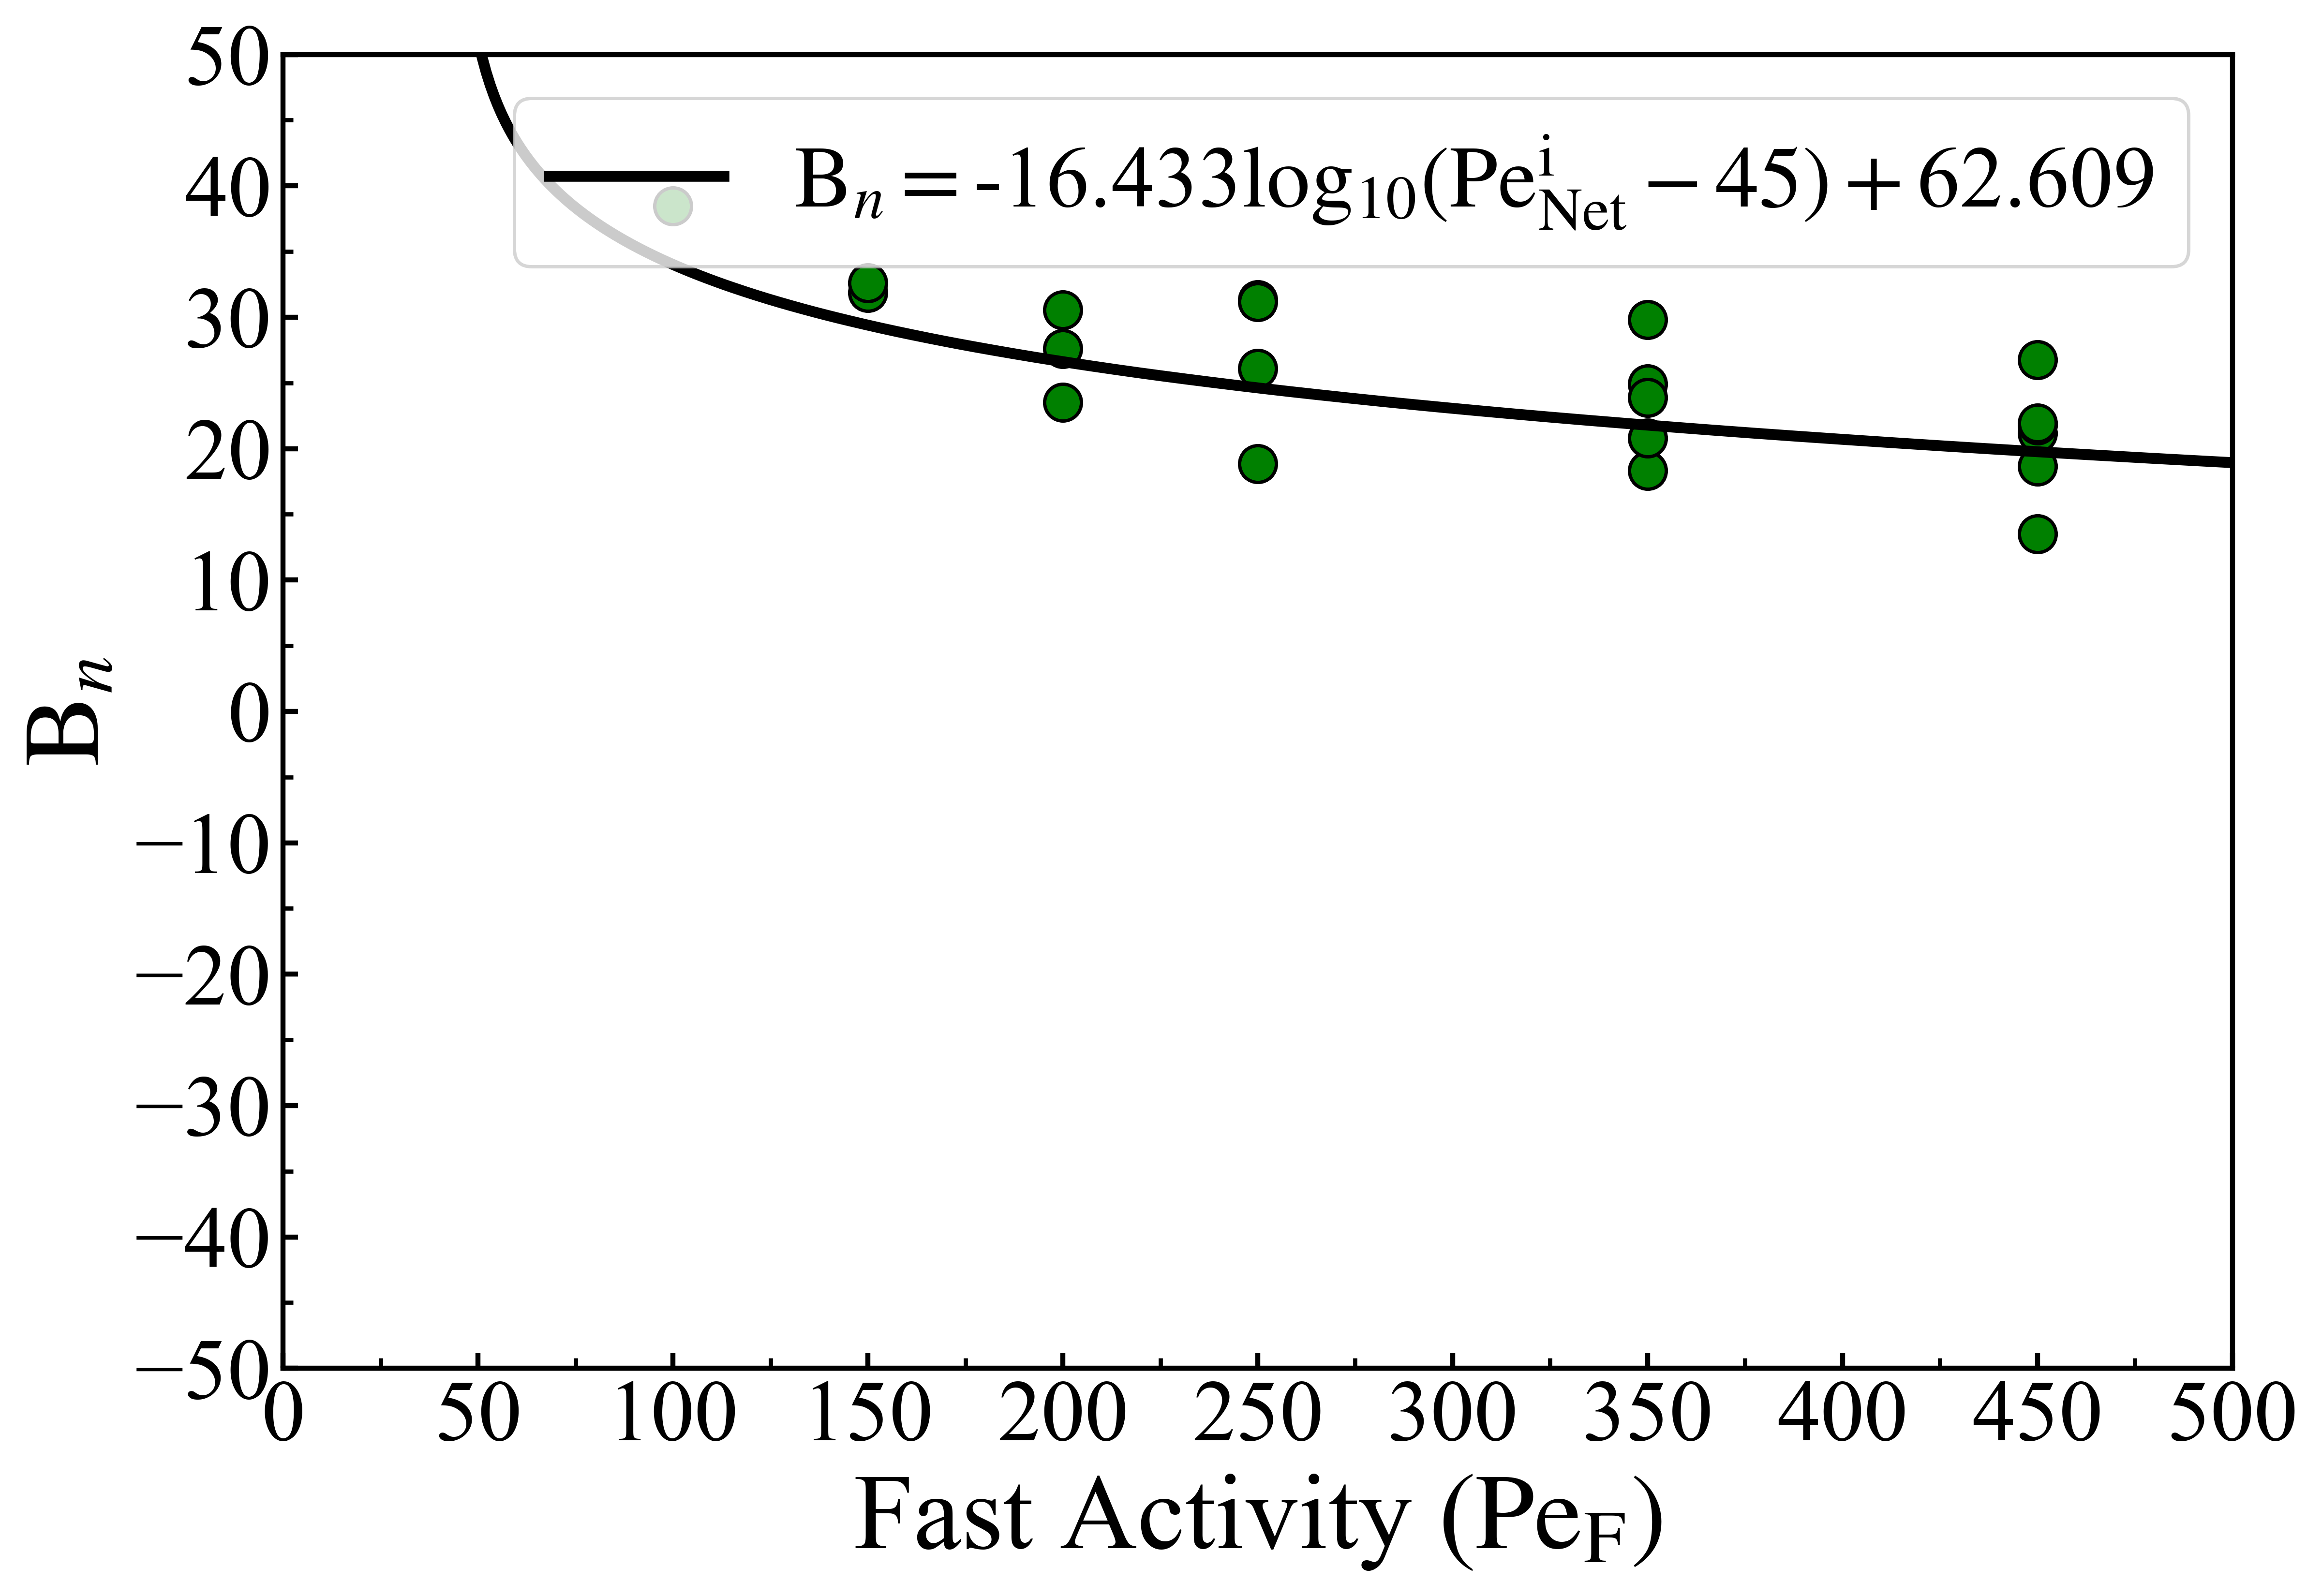

0.032810898741927955
0.8674055141115051


<ipython-input-38-a17af7e899d0>:181: RuntimeWarning: invalid value encountered in log10
  y = A*np.log10(x-45)+B
<ipython-input-38-a17af7e899d0>:200: RuntimeWarning: invalid value encountered in log10
  plt.plot(x_span, np.log10(x_span-45)*fit_A + fit_B, color='black', linewidth=1.8*1.8, label=r'$\mathrm{C}_n=$'+str(round(fit_A,3))+r'$\mathrm{log}_{10}(\mathrm{Pe}_\mathrm{Net}^\mathrm{i}-45)+$' + str(round(fit_B,3)))


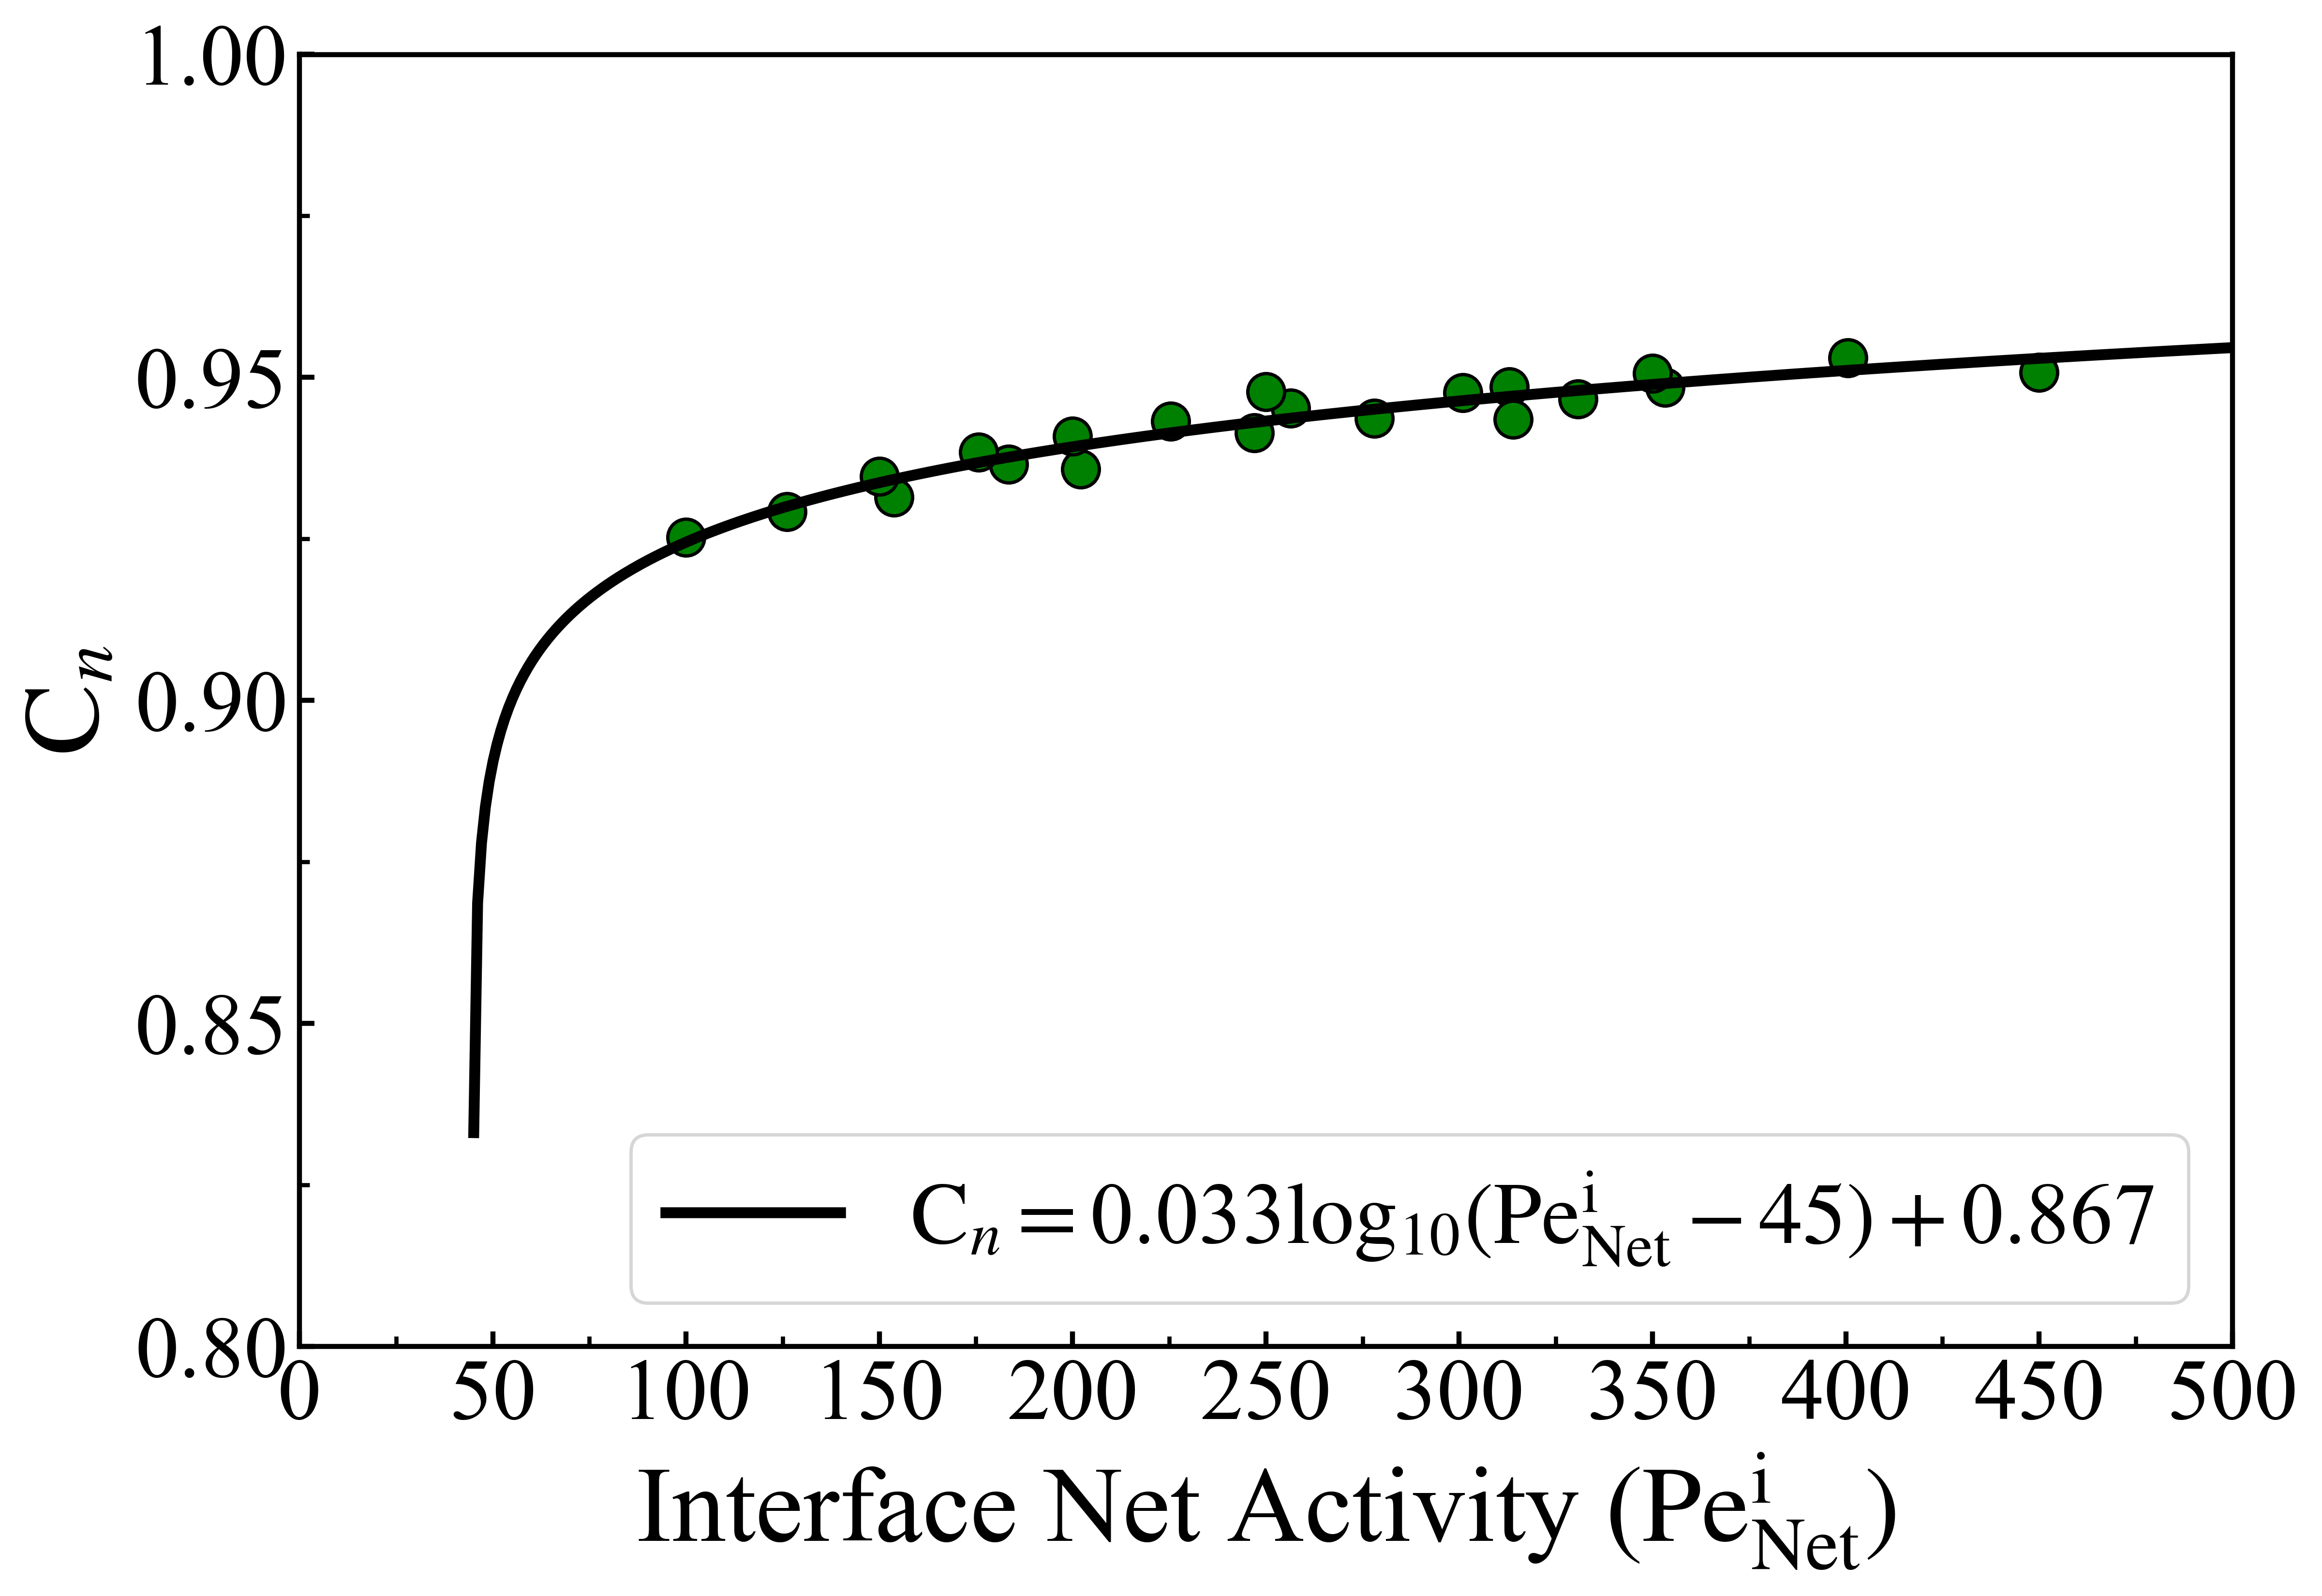

0.16357709032407278
-0.09354367589969947


<ipython-input-38-a17af7e899d0>:237: RuntimeWarning: invalid value encountered in log10
  y = A*np.log10(x-45)+B
<ipython-input-38-a17af7e899d0>:256: RuntimeWarning: invalid value encountered in log10
  plt.plot(x_span, np.log10(x_span-45)*fit_A + fit_B, color='black', linewidth=1.8*1.8, label=r'$\mathrm{A}_\alpha=$'+str(round(fit_A,3))+r'$\mathrm{log}_{10}(\mathrm{Pe}_\mathrm{Net}^\mathrm{i}-45)+$' + str(round(fit_B,3)))


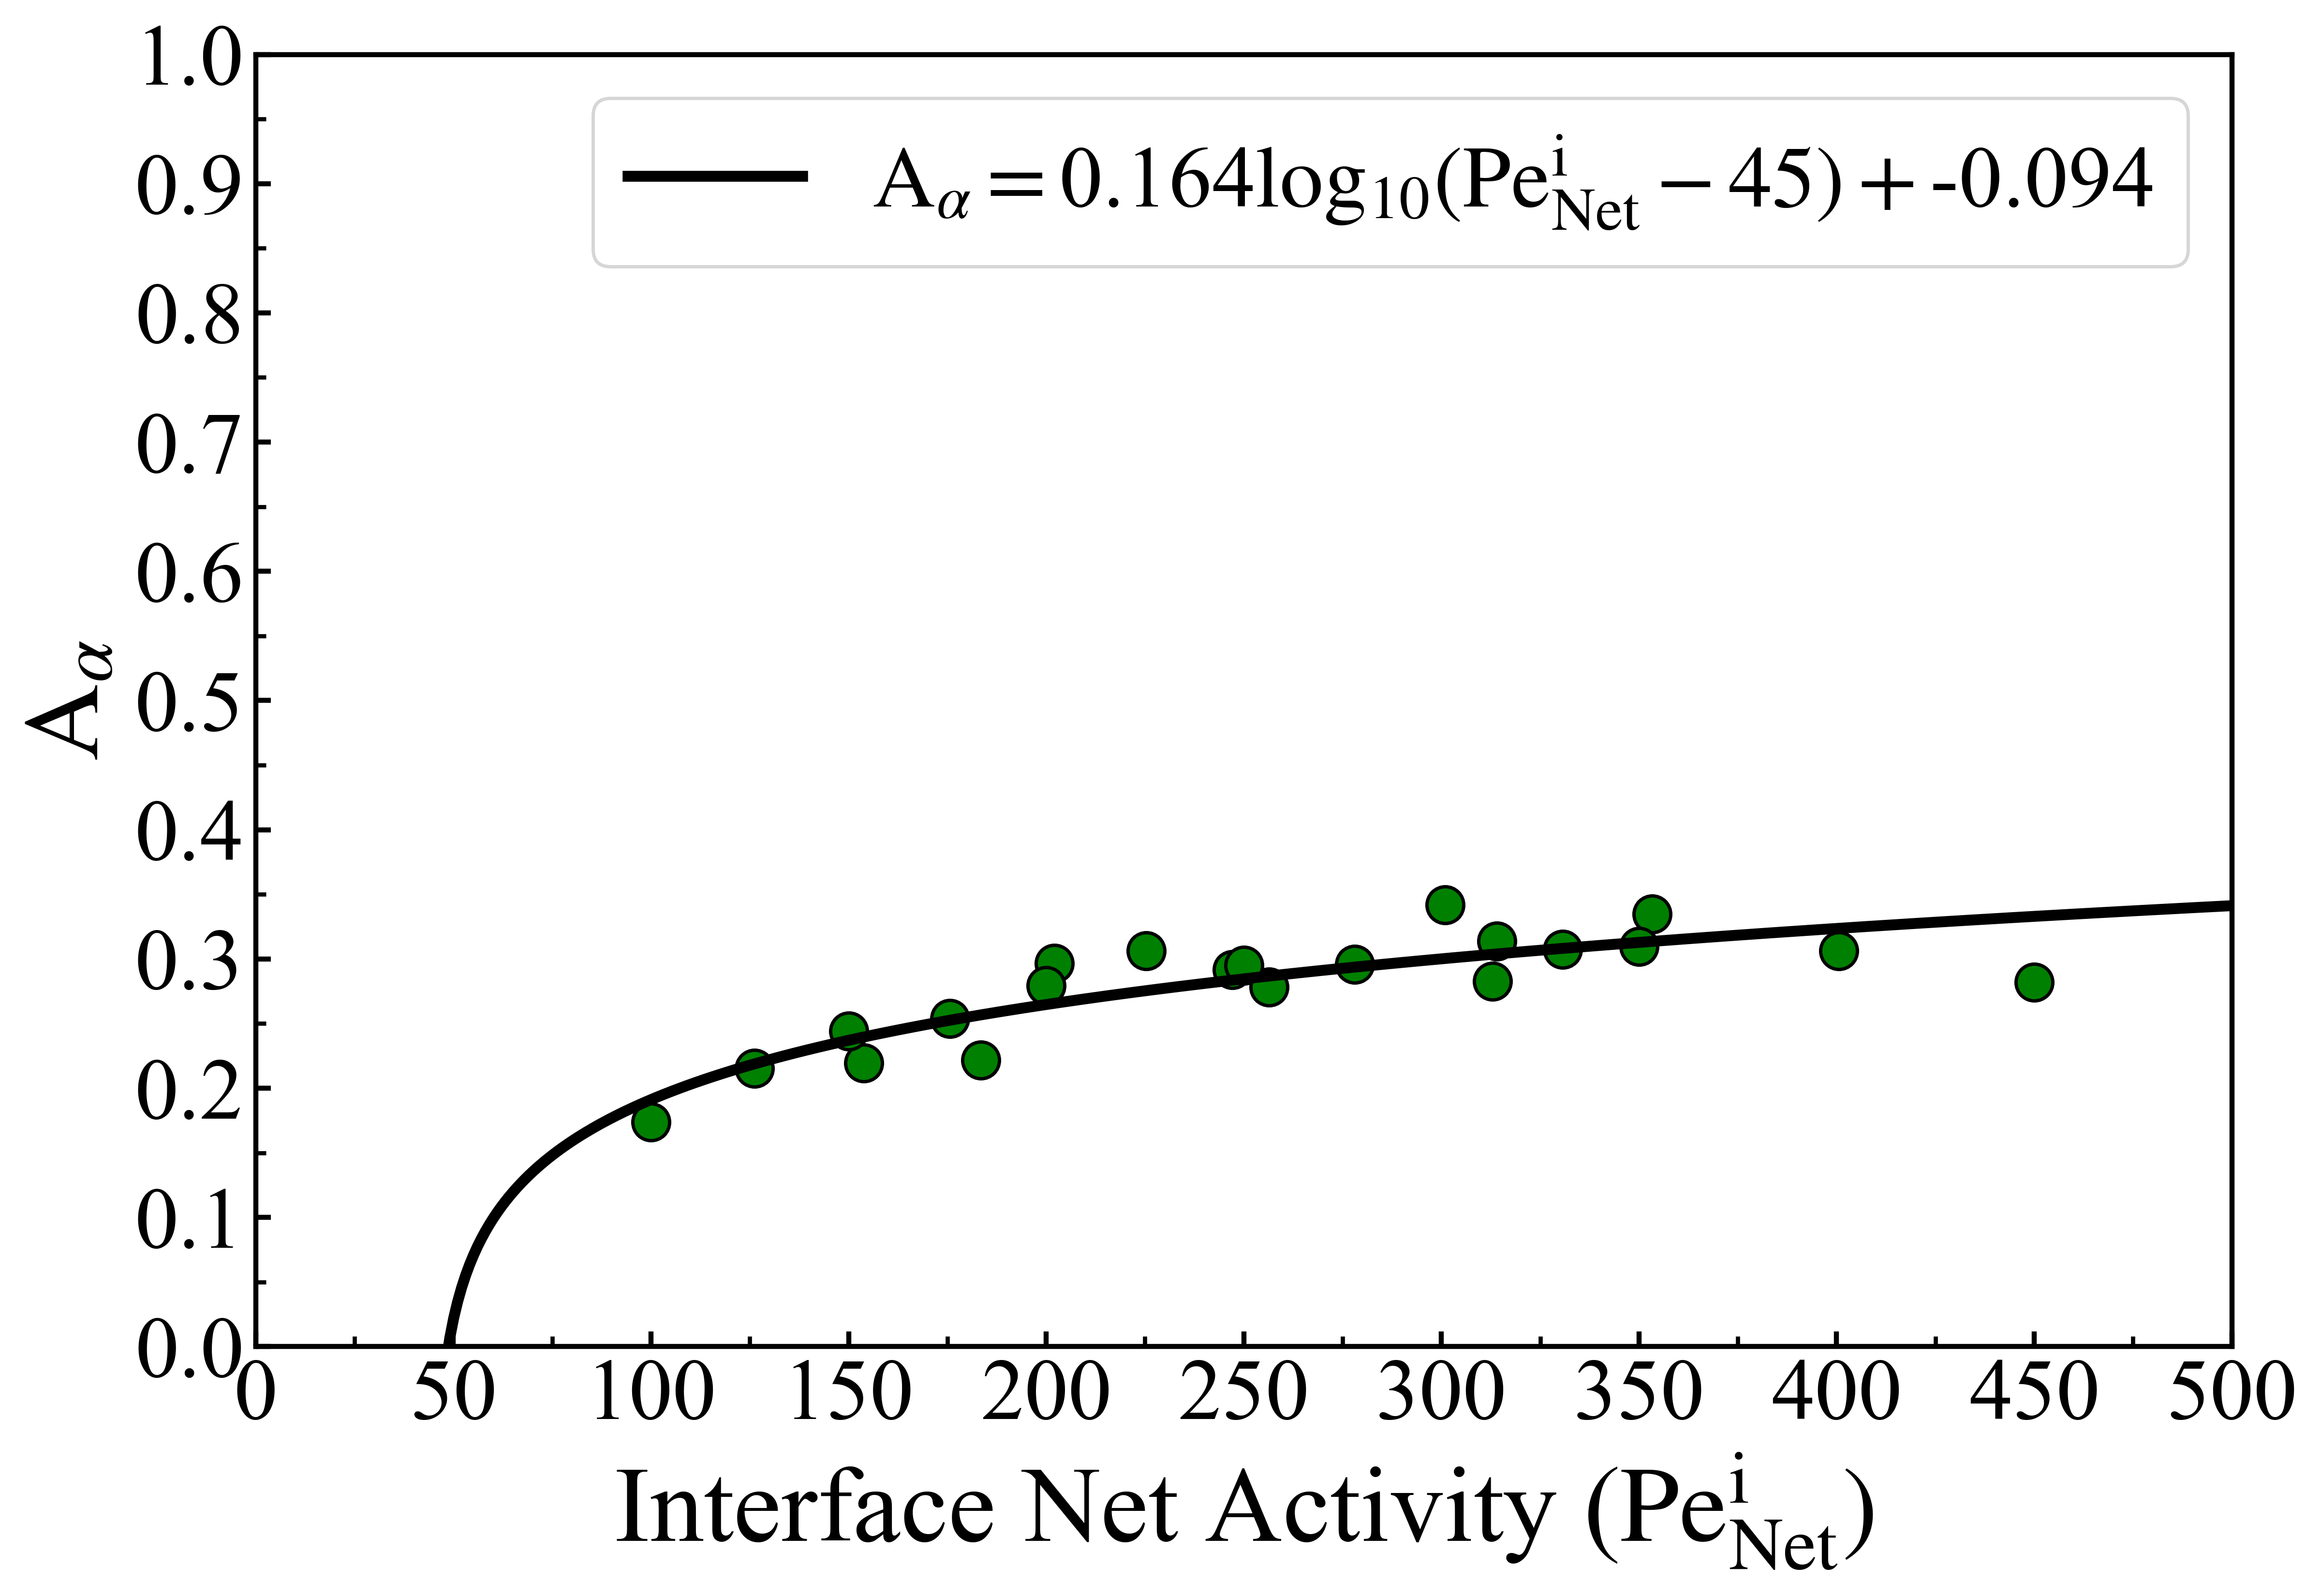

0.06965293602427935
0.7747842770455968


<ipython-input-38-a17af7e899d0>:292: RuntimeWarning: invalid value encountered in log10
  y = A*np.log10(x-45)+B
<ipython-input-38-a17af7e899d0>:311: RuntimeWarning: invalid value encountered in log10
  plt.plot(x_span, np.log10(x_span-45)*fit_A + fit_B, color='black', linewidth=1.8*1.8, label=r'$\mathrm{B}_\alpha=$'+str(round(fit_A,3))+r'$\mathrm{log}_{10}(\mathrm{Pe}_\mathrm{S}-45)+$' + str(round(fit_B,3)))


In [ ]:
fast = np.where((interpart_type==0) & (interpart_peA >50))[0]
rand = np.where((interpart_type==1) & (interpart_peA >50))[0]
slow = np.where((interpart_type==2) & (interpart_peB >50))[0]
fsize=10
fast_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                      markeredgecolor=fastCol,
                      markerfacecolor='None', 
                      label='Fast Interface', markersize=(2.4*msz * mkSz[0])))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                      markeredgecolor='purple',
                      markerfacecolor='None', 
                      label='Homogeneous', markersize=(2.4*msz * mkSz[0])))
#Define colors for plots    
yellow = ("#fdfd96")
green = ("#77dd77")
red = ("#ff6961")
purple = ("#cab2d6")
std = 0

nonzero = np.where(peA_arr>50)[0]

fig, ax1 = plt.subplots(figsize=(10,7))

std = 0
for k in range(0, len(A_mean[nonzero])):
    std += (A_mean[nonzero][k]-np.mean(A_mean[nonzero]))**2
std_beta = (std/len(A_mean[nonzero]))**0.5

def Gauss4(x, A, B):
    y = A*np.log10(x-45)+B
    return y

parameters, covariance = curve_fit(Gauss4, pe_int_mean[nonzero], A_mean[nonzero])

fit_A = parameters[0]
fit_B = parameters[1]

y_arr = np.log10(pe_int_mean[nonzero]-45)*fit_A + fit_B

num = np.sum((y_arr - A_mean[nonzero])**2)
denom = np.sum((A_mean[nonzero] - np.mean(A_mean[nonzero]))**2)
r_squared = 1-num/denom
print('int')
print(r_squared)

parameters, covariance = curve_fit(Gauss4, pe_dense_mean[nonzero], A_mean[nonzero])

fit_A = parameters[0]
fit_B = parameters[1]

y_arr = np.log10(pe_dense_mean[nonzero]-45)*fit_A + fit_B

num = np.sum((y_arr - A_mean[nonzero])**2)
denom = np.sum((A_mean[nonzero] - np.mean(A_mean[nonzero]))**2)
r_squared = 1-num/denom
print('dense')
print(r_squared)

parameters, covariance = curve_fit(Gauss4, pe_gas_mean[nonzero], A_mean[nonzero])

fit_A = parameters[0]
fit_B = parameters[1]

y_arr = np.log10(pe_gas_mean[nonzero]-45)*fit_A + fit_B

num = np.sum((y_arr - A_mean[nonzero])**2)
denom = np.sum((A_mean[nonzero] - np.mean(A_mean[nonzero]))**2)
r_squared = 1-num/denom
print('gas')
print(r_squared)

parameters, covariance = curve_fit(Gauss4, pe_bulk_mean[nonzero], A_mean[nonzero])

fit_A = parameters[0]
fit_B = parameters[1]

y_arr = np.log10(pe_bulk_mean[nonzero]-45)*fit_A + fit_B

num = np.sum((y_arr - A_mean[nonzero])**2)
denom = np.sum((A_mean[nonzero] - np.mean(A_mean[nonzero]))**2)
r_squared = 1-num/denom
print('bulk')
print(r_squared)

parameters, covariance = curve_fit(Gauss4, peA_arr[nonzero], A_mean[nonzero])

fit_A = parameters[0]
fit_B = parameters[1]

y_arr = np.log10(peA_arr[nonzero]-45)*fit_A + fit_B

num = np.sum((y_arr - A_mean[nonzero])**2)
denom = np.sum((A_mean[nonzero] - np.mean(A_mean[nonzero]))**2)
r_squared = 1-num/denom
print('slow')
print(r_squared)

parameters, covariance = curve_fit(Gauss4, peB_arr[nonzero], A_mean[nonzero])

fit_A = parameters[0]
fit_B = parameters[1]

y_arr = np.log10(peB_arr[nonzero]-45)*fit_A + fit_B

num = np.sum((y_arr - A_mean[nonzero])**2)
denom = np.sum((A_mean[nonzero] - np.mean(A_mean[nonzero]))**2)
r_squared = 1-num/denom
print('fast')
print(r_squared)


parameters, covariance = curve_fit(Gauss4, peA_arr[nonzero]*0.5+peB_arr[nonzero]*0.5, A_mean[nonzero])

fit_A = parameters[0]
fit_B = parameters[1]

y_arr = np.log10((peA_arr[nonzero]*0.5+peB_arr[nonzero]*0.5)-45)*fit_A + fit_B

num = np.sum((y_arr - A_mean[nonzero])**2)
denom = np.sum((A_mean[nonzero] - np.mean(A_mean[nonzero]))**2)
r_squared = 1-num/denom
print('net')
print(r_squared)


print(fit_A)
print(fit_B)
x_span = np.linspace(0, 500, num=500)

fit_y = Gauss4(radius_arr_final, fit_A, fit_B)

y_arr = np.ones(2) * np.mean(A_mean[nonzero])
x_arr = np.array([0, 500])
y_arr_min = y_arr - std_beta
y_arr_max = y_arr + std_beta
#pe_int_mean[nonzero]
ax1.scatter(peB_arr[nonzero], A_mean[nonzero], linewidths=1.0, edgecolor='black', facecolor='green', s=120.0)
plt.plot(x_span, np.log10(x_span-45)*fit_A + fit_B, color='black', linewidth=1.8*1.8, label=r'$\mathrm{B}_n=$'+str(round(fit_A,3))+r'$\mathrm{log}_{10}(\mathrm{Pe}_\mathrm{Net}^\mathrm{i}-45)+$' + str(round(fit_B,3)))      
# Set all the x ticks for radial plots
loc = ticker.MultipleLocator(base=50)
ax1.xaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=25)
ax1.xaxis.set_minor_locator(loc)
props = dict(boxstyle='square', facecolor='white', edgecolor='none', alpha=0.85, pad=0.1)
#ax1.text(0.68, 0.58, r'$\alpha(x)=\mathrm{A}_\alpha e^{-(x-\mathrm{B}_\alpha)^2/2 \mathrm{C}_\alpha^2}$', zorder=10,
#                                               transform=ax1.transAxes,
#                                               fontsize=28,fontdict={'fontname':'Helvetica'}, bbox=props)  
# Set y ticks
loc = ticker.MultipleLocator(base=10)
ax1.yaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=5)
ax1.yaxis.set_minor_locator(loc)
                                    
    
ax1.tick_params(axis='x', labelsize=26)
ax1.tick_params(axis='y', labelsize=26)
ax1.set_xlabel(r'Fast Activity ($\mathrm{Pe}_\mathrm{F})$', fontsize=32)
ax1.set_ylabel(r'$\mathrm{B}_n$', fontsize=32)
ax1.set_ylim([-50,50])
ax1.set_xlim([0,500.0])
plt.legend(loc='upper right', fontsize=26)

plt.tight_layout()
plt.show()

fig, ax1 = plt.subplots(figsize=(10,7))

std = 0
for k in range(0, len(B_mean[nonzero])):
    std += (B_mean[nonzero][k]-np.mean(B_mean[nonzero]))**2
std_beta = (std/len(B_mean[nonzero]))**0.5

def Gauss4(x, A, B):
    y = A*np.log10(x-45)+B
    return y

parameters, covariance = curve_fit(Gauss4, pe_int_mean[nonzero], B_mean[nonzero])

fit_A = parameters[0]
fit_B = parameters[1]
print(fit_A)
print(fit_B)
x_span = np.linspace(0, 500, num=500)

fit_y = Gauss4(radius_arr_final, fit_A, fit_B)

y_arr = np.ones(2) * np.mean(B_mean[nonzero])
x_arr = np.array([0, 500])
y_arr_min = y_arr - std_beta
y_arr_max = y_arr + std_beta

ax1.scatter(pe_int_mean[nonzero], B_mean[nonzero], linewidths=1.0, edgecolor='black', facecolor='green', s=120.0)
plt.plot(x_span, np.log10(x_span-45)*fit_A + fit_B, color='black', linewidth=1.8*1.8, label=r'$\mathrm{C}_n=$'+str(round(fit_A,3))+r'$\mathrm{log}_{10}(\mathrm{Pe}_\mathrm{Net}^\mathrm{i}-45)+$' + str(round(fit_B,3)))      

# Set all the x ticks for radial plots
loc = ticker.MultipleLocator(base=50)
ax1.xaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=25)
ax1.xaxis.set_minor_locator(loc)
props = dict(boxstyle='square', facecolor='white', edgecolor='none', alpha=0.85, pad=0.1)
#ax1.text(0.68, 0.58, r'$\alpha(x)=\mathrm{A}_\alpha e^{-(x-\mathrm{B}_\alpha)^2/2 \mathrm{C}_\alpha^2}$', zorder=10,
#                                               transform=ax1.transAxes,
#                                               fontsize=28,fontdict={'fontname':'Helvetica'}, bbox=props)  
# Set y ticks
loc = ticker.MultipleLocator(base=0.05)
ax1.yaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=0.025)
ax1.yaxis.set_minor_locator(loc)
                                    
    
ax1.tick_params(axis='x', labelsize=26)
ax1.tick_params(axis='y', labelsize=26)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i})$', fontsize=32)
ax1.set_ylabel(r'$\mathrm{C}_n$', fontsize=32)
ax1.set_ylim([0.8,1.0])
ax1.set_xlim([0,500.0])
plt.legend(loc='lower right', fontsize=26)

plt.tight_layout()
plt.show()

fig, ax1 = plt.subplots(figsize=(10,7))

std = 0
for k in range(0, len(A_mean2[nonzero])):
    std += (A_mean2[nonzero][k]-np.mean(A_mean2[nonzero]))**2
std_beta = (std/len(A_mean2[nonzero]))**0.5

def Gauss4(x, A, B):
    y = A*np.log10(x-45)+B
    return y

parameters, covariance = curve_fit(Gauss4, pe_int_mean[nonzero], A_mean2[nonzero])

fit_A = parameters[0]
fit_B = parameters[1]
print(fit_A)
print(fit_B)
x_span = np.linspace(0, 500, num=500)

fit_y = Gauss4(radius_arr_final, fit_A, fit_B)

y_arr = np.ones(2) * np.mean(A_mean2[nonzero])
x_arr = np.array([0, 500])
y_arr_min = y_arr - std_beta
y_arr_max = y_arr + std_beta
#pe_int_mean[nonzero]
ax1.scatter(pe_int_mean[nonzero], A_mean2[nonzero], linewidths=1.0, edgecolor='black', facecolor='green', s=120.0)
plt.plot(x_span, np.log10(x_span-45)*fit_A + fit_B, color='black', linewidth=1.8*1.8, label=r'$\mathrm{A}_\alpha=$'+str(round(fit_A,3))+r'$\mathrm{log}_{10}(\mathrm{Pe}_\mathrm{Net}^\mathrm{i}-45)+$' + str(round(fit_B,3)))      
# Set all the x ticks for radial plots
loc = ticker.MultipleLocator(base=50)
ax1.xaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=25)
ax1.xaxis.set_minor_locator(loc)
props = dict(boxstyle='square', facecolor='white', edgecolor='none', alpha=0.85, pad=0.1)
#ax1.text(0.68, 0.58, r'$\alpha(x)=\mathrm{A}_\alpha e^{-(x-\mathrm{B}_\alpha)^2/2 \mathrm{C}_\alpha^2}$', zorder=10,
#                                               transform=ax1.transAxes,
#                                               fontsize=28,fontdict={'fontname':'Helvetica'}, bbox=props)  
# Set y ticks
loc = ticker.MultipleLocator(base=0.1)
ax1.yaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=0.05)
ax1.yaxis.set_minor_locator(loc)
                                    
    
ax1.tick_params(axis='x', labelsize=26)
ax1.tick_params(axis='y', labelsize=26)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i})$', fontsize=32)
ax1.set_ylabel(r'$\mathrm{A}_\alpha$', fontsize=32)
ax1.set_ylim([0,1])
ax1.set_xlim([0,500.0])
plt.legend(loc='upper right', fontsize=26)

plt.tight_layout()
plt.show()

fig, ax1 = plt.subplots(figsize=(10,7))

std = 0
for k in range(0, len(B_mean2[nonzero])):
    std += (B_mean2[nonzero][k]-np.mean(B_mean2[nonzero]))**2
std_beta = (std/len(B_mean2[nonzero]))**0.5

def Gauss4(x, A, B):
    y = A*np.log10(x-45)+B
    return y

parameters, covariance = curve_fit(Gauss4, peA_arr[nonzero], B_mean2[nonzero])

fit_A = parameters[0]
fit_B = parameters[1]
print(fit_A)
print(fit_B)
x_span = np.linspace(0, 500, num=500)

fit_y = Gauss4(radius_arr_final, fit_A, fit_B)

y_arr = np.ones(2) * np.mean(B_mean2[nonzero])
x_arr = np.array([0, 500])
y_arr_min = y_arr - std_beta
y_arr_max = y_arr + std_beta

ax1.scatter(peA_arr[nonzero], B_mean2[nonzero], linewidths=1.0, edgecolor='black', facecolor='green', s=120.0)
plt.plot(x_span, np.log10(x_span-45)*fit_A + fit_B, color='black', linewidth=1.8*1.8, label=r'$\mathrm{B}_\alpha=$'+str(round(fit_A,3))+r'$\mathrm{log}_{10}(\mathrm{Pe}_\mathrm{S}-45)+$' + str(round(fit_B,3)))      

# Set all the x ticks for radial plots
loc = ticker.MultipleLocator(base=50)
ax1.xaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=25)
ax1.xaxis.set_minor_locator(loc)
props = dict(boxstyle='square', facecolor='white', edgecolor='none', alpha=0.85, pad=0.1)
#ax1.text(0.68, 0.58, r'$\alpha(x)=\mathrm{A}_\alpha e^{-(x-\mathrm{B}_\alpha)^2/2 \mathrm{C}_\alpha^2}$', zorder=10,
#                                               transform=ax1.transAxes,
#                                               fontsize=28,fontdict={'fontname':'Helvetica'}, bbox=props)  
# Set y ticks
loc = ticker.MultipleLocator(base=0.05)
ax1.yaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=0.025)
ax1.yaxis.set_minor_locator(loc)
                                    
    
ax1.tick_params(axis='x', labelsize=26)
ax1.tick_params(axis='y', labelsize=26)
ax1.set_xlabel(r'Slow Activity ($\mathrm{Pe}_\mathrm{S})$', fontsize=32)
ax1.set_ylabel(r'$\mathrm{B}_\alpha$', fontsize=32)
#ax1.set_ylim([0.8,1.0])
ax1.set_xlim([0,500.0])
plt.legend(loc='lower right', fontsize=26)

plt.tight_layout()
plt.show()

fig, ax1 = plt.subplots(figsize=(10,7))

std = 0
for k in range(0, len(C_mean2[nonzero])):
    std += (C_mean2[nonzero][k]-np.mean(C_mean2[nonzero]))**2
std_beta = (std/len(C_mean2[nonzero]))**0.5

def Gauss4(x, A, B):
    y = A*np.log10(x-45)+B
    return y

parameters, covariance = curve_fit(Gauss4, peA_arr[nonzero]/peB_arr[nonzero], C_mean2[nonzero])

fit_A = parameters[0]
fit_B = parameters[1]
print(fit_A)
print(fit_B)
x_span = np.linspace(0, 500, num=500)

fit_y = Gauss4(radius_arr_final, fit_A, fit_B)

y_arr = np.ones(2) * np.mean(C_mean2[nonzero])
x_arr = np.array([0, 500])
y_arr_min = y_arr - std_beta
y_arr_max = y_arr + std_beta

ax1.scatter(pe_int_mean[nonzero], C_mean2[nonzero], linewidths=1.0, edgecolor='black', facecolor='green', s=120.0)
plt.plot(x_arr, y_arr, color='black', linewidth=1.8*1.8, label=r'$\mathrm{C}_\alpha=$'+str(round(np.mean(C_mean2),3)))      
ax1.fill_between(x_arr, y_arr_min, y_arr_max, color='black', alpha=0.25)

# Set all the x ticks for radial plots
loc = ticker.MultipleLocator(base=50)
ax1.xaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=25)
ax1.xaxis.set_minor_locator(loc)
props = dict(boxstyle='square', facecolor='white', edgecolor='none', alpha=0.85, pad=0.1)
#ax1.text(0.68, 0.58, r'$\alpha(x)=\mathrm{A}_\alpha e^{-(x-\mathrm{B}_\alpha)^2/2 \mathrm{C}_\alpha^2}$', zorder=10,
#                                               transform=ax1.transAxes,
#                                               fontsize=28,fontdict={'fontname':'Helvetica'}, bbox=props)  
# Set y ticks
loc = ticker.MultipleLocator(base=0.05)
ax1.yaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=0.025)
ax1.yaxis.set_minor_locator(loc)
                                    
    
ax1.tick_params(axis='x', labelsize=26)
ax1.tick_params(axis='y', labelsize=26)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i})$', fontsize=32)

ax1.set_ylabel(r'$\mathrm{C}_\alpha$', fontsize=32)
ax1.set_ylim([0,0.2])
ax1.set_xlim([0,500])
plt.legend(loc='lower right', fontsize=26)


#ax1.text(0.823, 0.06, s=r'$C_\alpha$' + ' = ' + '{:.1f}'.format(round(np.mean(C_mean2),3)),
#                fontsize=26, transform = ax1.transAxes,
#                bbox=dict(facecolor=(1,1,1,0.75), edgecolor=(0,0,0,1), boxstyle='round, pad=0.1'))

plt.tight_layout()
plt.show()

In [ ]:
align_peA=np.array([])
align_peB=np.array([])
align_peNet=np.array([])
first_align_peNet=np.array([])
first_interpart_peNet=np.array([])
first_interpart_peA=np.array([])
first_interpart_peB=np.array([])

align_xA=np.array([])
align_eps=np.array([])
align_pnum=np.array([])
align_phi=np.array([])
align_press_arr = np.array([])
first_align_press = np.array([])
first_bulk_press = np.array([])
first_align_peA=np.array([])
first_align_peB=np.array([])

width_peA=np.array([])
width_peB=np.array([])
width_peNet=np.array([])
width_xA=np.array([])
width_eps=np.array([])
width_pnum=np.array([])
width_phi=np.array([])

interpart_peA=np.array([])
interpart_peB=np.array([])
interpart_peNet=np.array([])
interpart_xA=np.array([])
interpart_eps=np.array([])
interpart_pnum=np.array([])
interpart_phi=np.array([])
interpart_press=np.array([])
interpart_press_expand=np.array([])
avg_shear=np.array([])
fastCol = '#e31a1c'
slowCol = '#081d58'

avg_rad = np.array([])
avg_width = np.array([])
avg_clust = np.array([])
avg_circularity = np.array([])

bulk_lat_time_mean = np.array([])
int_lat_time_mean = np.array([])
all_lat_time_mean = np.array([])
bulk_lat_time_std = np.array([])
int_lat_time_std = np.array([])
all_lat_time_std = np.array([])
from scipy.optimize import curve_fit


avg_bulk_nA = np.array([])
avg_bulk_nB = np.array([])
avg_bulk_n = np.array([])
avg_dense_nA = np.array([])
avg_dense_nB = np.array([])
avg_dense_n = np.array([])
avg_int_n = np.array([])
avg_int_nA = np.array([])
avg_int_nB = np.array([])
avg_gas_nA = np.array([])
avg_gas_nB = np.array([])
avg_gas_n = np.array([])

align_type = np.array([])
interpart_type = np.array([])

width_type = np.array([])

radius_arr_final = np.linspace(0,1.4,num=30)
num_dens_arr_final = np.zeros(30)
align_arr_final = np.zeros(30)
press_arr_final = np.zeros(30)
final_count = np.zeros(30)
final_count_count = np.zeros(30)

avg_int_theory_arr = np.array([])
avg_bulk_theory_arr = np.array([])
def ljForce(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / sigma) * ((2*(div**13)) - (div)**7)
    return dU

def avgCollisionForce(pe, power=1.):
    '''Computed from the integral of possible angles'''
    peCritical = 40.
    if pe < peCritical:
        pe = 0
    else:
        pe -= peCritical
    magnitude = 6.
    # A vector sum of the six nearest neighbors
    magnitude = np.sqrt(28)
#     return (magnitude * (pe**power)) / (np.pi)
#     return (pe * (1. + (8./(np.pi**2.))))
    coeff = 1.92#3.0#1.92#2.03#3.5#2.03
    #coeff= 0.4053
    return (pe * coeff)

def conForRClust(pe, eps):
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(pe):
            r -= j
        r += j
    out = r
    return out
def densProbability(r, activity_net, activity_slow):
    "Using similar triangles to find sides"
    gas_dense_dif_phi = 0.866 * np.log10(activity_net - 46.993) - 0.443
    rate_decay = -6.151 * np.log10(activity_net-49.921) - 4.392
    mid_point = 0.044 * np.log10(activity_slow-49.893) + 0.836
    gas_phi = -0.26 * np.log10(activity_slow-41.742)+0.783
    
    num_dens_r = ((gas_dense_dif_phi / (1+np.exp(-rate_decay * (r-mid_point)))) + gas_phi)
    
    return num_dens_r

def alignProbability(r, activity_net, activity_slow):
    "Using similar triangles to find sides"
    max_align = 0.2019 * np.log10(activity_net - 41.2803) - 0.1885
    mid_point = 0.0492 * np.log10(activity_slow - 47.0061) + 0.8220
    std_dev = 0.1057
    align_r = max_align * np.exp(-(r-mid_point)**2/(2*std_dev**2))
    
    return align_r
A_mean = np.array([])
B_mean = np.array([])
C_mean = np.array([])
D_mean = np.array([])
A_mean2 = np.array([])
B_mean2 = np.array([])
C_mean2 = np.array([])
A_avg_time_arr = np.array([])
B_avg_time_arr = np.array([])
C_avg_time_arr = np.array([])
D_avg_time_arr = np.array([])
A_std = np.array([])
B_std = np.array([])
C_std = np.array([])
D_std = np.array([])
A_std2 = np.array([])
B_std2 = np.array([])
C_std2 = np.array([])
pe_int_mean = np.array([])
pe_gas_mean = np.array([])
pe_bulk_mean = np.array([])
pe_dense_mean = np.array([])
peA_arr = np.array([])
peB_arr = np.array([])
alpha_max_mean = np.array([])
int_width_mean = np.array([])
for i in range(0, len(all_dens)):
    if (params['peA'][i]>0) & (params['peB'][i]>0):
        if (params['peA'][i]!=50) | (params['peB'][i]!=50):
            if (params['peA'][i]!=50) | (params['peB'][i]!=100):
                print('start')
                print(params['peA'][i])
                print(params['peB'][i])
                if all_dens[i].empty:
                    continue

                for l in range(0, len(all_pres_new)):
                    if all_pres_new[l].empty:
                        continue
                    if params3['peA'][l]==params['peA'][i]:
                        if params3['peB'][l]==params['peB'][i]:

                            #if pres2[k][0:4]==dens[i][0:4]:

                                for q in range(0, len(all_pres_new2)):

                                    if all_pres_new2[q].empty:
                                        continue
                                    #if pres3[q][0:4]==dens[i][0:4]:
                                    if params4['peA'][q]==params['peA'][i]:
                                        if params4['peB'][q]==params['peB'][i]:
                                            A_arr = np.array([])
                                            B_arr = np.array([])
                                            C_arr = np.array([])
                                            D_arr = np.array([])
                                            A_arr2 = np.array([])
                                            B_arr2 = np.array([])
                                            C_arr2 = np.array([])

                                            time_i = all_dens[i]['tauB']
                                            time_l = all_pres_new[l]['tauB']
                                            time_q = all_pres_new2[q]['tauB']

                                            #Instantiate arrays for reading in number density .txt file
                                            bulk_nA_arr = np.array([])
                                            bulk_nB_arr = np.array([])
                                            bulk_n_arr = np.array([])
                                            int_n_arr = np.array([])
                                            int_nA_arr = np.array([])
                                            int_nB_arr = np.array([])
                                            gas_nA_arr = np.array([])
                                            gas_n_arr = np.array([])
                                            gas_nB_arr = np.array([])
                                            dense_nA_arr = np.array([])
                                            dense_nB_arr = np.array([])
                                            dense_n_arr = np.array([])

                                            #Instantiate arrays for reading in lattice spacing .txt file
                                            bulk_lat_mean = np.array([])
                                            int_lat_mean = np.array([])
                                            all_lat_mean = np.array([])
                                            bulk_lat_std = np.array([])
                                            int_lat_std = np.array([])
                                            all_lat_std = np.array([])

                                            rat_edge_arr = 0
                                            rat_edge_val = 0

                                            time_dens = np.array([])
                                            time_arr = np.array([])
                                            radius_arr = np.array([])
                                            align_arr = np.array([])
                                            num_dens_arr = np.array([])
                                            press_arr = np.array([])
                                            align_max_arr = np.array([])
                                            int_width_arr = np.array([])





                                            #Loop over time in interface pressure .txt file
                                            for j in range(0, len(time_i)):



                                                #Current time in loop
                                                time = time_i[j]
                                                if time>(10):


                                                    #Read values and set variables from number density .txt files
                                                    time_id_q = np.where(time_q==time)[0]
                                                    if len(time_id_q)>0:
                                                        time_id = np.where(time_i==time)[0]
                                                        time_id2 = np.where(time_l==time)[0]
                                                        if len(time_id2)>0:

                                                            if len(time_id2)==1:
                                                                edge_width = all_pres_new[l]['radius'][time_id2[0]]
                                                                edge_width2 = all_pres_new[l]['edge_width'][time_id2[0]]
                                                                nB = all_pres_new[l]['Nb'][time_id2[0]]
                                                                nA = all_pres_new[l]['Na'][time_id2[0]]
                                                                rat_edge = (edge_width - edge_width2) / edge_width
                                                                rat_edge_arr+= rat_edge
                                                                rat_edge_val += 1

                                                            elif len(time_id2)>1:
                                                                edge_width = np.max(all_pres_new[l]['radius'][time_id2])
                                                                edge_width2 = np.max(all_pres_new[l]['edge_width'][time_id2[0]])
                                                                rat_edge = (edge_width - edge_width2) / edge_width
                                                                rat_edge_arr+= rat_edge
                                                                rat_edge_val += 1

                                                                nB = np.max(all_pres_new[l]['Nb'][time_id2])
                                                                nA = np.max(all_pres_new[l]['Na'][time_id2])
                                                            if time not in time_arr:
                                                                time_arr = np.append(time_arr, time)  

                                                                bin_size = all_pres_new2[q]['sizeBin'][time_id_q]
                                                                bin_area = bin_size**2
                                                                bulk_nA_arr = np.append(bulk_nA_arr, all_pres_new2[q]['Na_bulk'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_bulk'][time_id_q]))
                                                                bulk_nB_arr = np.append(bulk_nB_arr, all_pres_new2[q]['Nb_bulk'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_bulk'][time_id_q]))
                                                                bulk_n_arr = np.append(bulk_n_arr, (all_pres_new2[q]['Nb_bulk'][time_id_q]+all_pres_new2[q]['Na_bulk'][time_id_q]) / (bin_area * all_pres_new2[q]['NBin_bulk'][time_id_q]))
                                                                int_n_arr = np.append(int_n_arr, (all_pres_new2[q]['Na_int'][time_id_q]+all_pres_new2[q]['Nb_int'][time_id_q]) / (bin_area * all_pres_new2[q]['NBin_int'][time_id_q]))
                                                                int_nA_arr = np.append(int_nA_arr, all_pres_new2[q]['Na_int'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_int'][time_id_q]))
                                                                int_nB_arr = np.append(int_nB_arr, all_pres_new2[q]['Nb_int'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_int'][time_id_q]))
                                                                gas_n_arr = np.append(gas_n_arr, (all_pres_new2[q]['Na_gas'][time_id_q] + all_pres_new2[q]['Nb_gas'][time_id_q]) / (bin_area * all_pres_new2[q]['NBin_gas'][time_id_q]))
                                                                gas_nA_arr = np.append(gas_nA_arr, all_pres_new2[q]['Na_gas'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_gas'][time_id_q]))
                                                                gas_nB_arr = np.append(gas_nB_arr, all_pres_new2[q]['Nb_gas'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_gas'][time_id_q]))
                                                                dense_n_arr = np.append(dense_n_arr, (all_pres_new2[q]['Na_int'][time_id_q]+all_pres_new2[q]['Nb_int'][time_id_q]+all_pres_new2[q]['Na_bulk'][time_id_q]+all_pres_new2[q]['Nb_bulk'][time_id_q]) / (bin_area * (all_pres_new2[q]['NBin_int'][time_id_q]+all_pres_new2[q]['NBin_bulk'][time_id_q])))
                                                                dense_nA_arr = np.append(dense_nA_arr, (all_pres_new2[q]['Na_int'][time_id_q]+all_pres_new2[q]['Na_bulk'][time_id_q]) / (bin_area * (all_pres_new2[q]['NBin_int'][time_id_q]+all_pres_new2[q]['NBin_bulk'][time_id_q])))
                                                                dense_nB_arr = np.append(dense_nB_arr, (all_pres_new2[q]['Nb_int'][time_id_q]+all_pres_new2[q]['Nb_bulk'][time_id_q]) / (bin_area * (all_pres_new2[q]['NBin_int'][time_id_q]+all_pres_new2[q]['NBin_bulk'][time_id_q])))

                                                                if len(time_arr)>=2:


                                                                    if len(radius_arr)>0:
                                                                        if np.max(radius_arr)<edge_width:
                                                                            num_dens_arr_temp = np.zeros(30)
                                                                            align_arr_temp = np.zeros(30)
                                                                            press_arr_temp = np.zeros(30)

                                                                            for k in range(0, len(radius_arr_final)-1):
                                                                                rad_where = np.where((radius_arr_final[k]<=radius_arr) & (radius_arr<radius_arr_final[k+1]))[0]
                                                                                if len(rad_where)>0:
                                                                                    nonzero_align = np.where(align_arr[rad_where]!=0)[0]
                                                                                    if len(nonzero_align)>0:
                                                                                        press_arr_final[k]+=np.mean(press_arr[rad_where][nonzero_align])
                                                                                        align_arr_final[k]+=np.mean(align_arr[rad_where][nonzero_align])
                                                                                        num_dens_arr_final[k]+=np.mean(num_dens_arr[rad_where][nonzero_align])
                                                                                        final_count[k]+=1
                                                                                        final_count_count[k]+=len(rad_where)

                                                                                        press_arr_temp[k]=np.mean(press_arr[rad_where][nonzero_align])
                                                                                        align_arr_temp[k]=np.mean(align_arr[rad_where][nonzero_align])
                                                                                        num_dens_arr_temp[k]=np.mean(num_dens_arr[rad_where][nonzero_align])
                                                                                        #temp_count[k]+=1
                                                                                        #temp_count_count[k]+=len(rad_where)

                                                                            align_max_arr = np.append(align_max_arr, np.max(align_arr_temp))
                                                                            int_width_arr = np.append(int_width_arr, edge_width2)
                                                                            
                                                                            fastSim = '#de2d26'
                                                                            fastTheory = '#fc9272'
                                                                            slowSim = '#3182bd'
                                                                            slowTheory = '#9ecae1'
                                                                            fsize=10

                                                                            slowTheory = '#081d58'
                                                                            fastTheory = '#e31a1c'
                                                                            press_arr_fit = press_arr_temp
                                                                            align_arr_fit = align_arr_temp
                                                                            num_dens_arr_fit = num_dens_arr_temp

                                                                            peNet_int = np.mean((int_nA_arr[-1]/int_n_arr[-1]) * float(params['peA'][i]) + (int_nB_arr[-1]/int_n_arr[-1]) * float(params['peB'][i]))

                                                                            #latNet_int = np.zeros(len(peNet_int))
                                                                            phi_cp = np.pi / (2*np.sqrt(3))
                                                                            #for z in range(0, len(peNet_int)):
                                                                            latNet_int = conForRClust(peNet_int-50, 1.0)

                                                                            phid_theory = (phi_cp / latNet_int**2) / (np.pi/4)


                                                                            phig_theory = (((3 * np.pi**2 * 4.5) / 4) * ((latNet_int * peNet_int)**(-1))) / (np.pi/4)


                                                                            def Gauss4(x, A, B, C, D):
                                                                                y = (A)/(1+np.exp(B*(x-C)))+D
                                                                                return y
                                                                            def Gauss(x, A, B, C):
                                                                                y = A*np.exp(-(x-B)**2/(2*C**2))
                                                                                return y

                                                                            rad_max = np.where(num_dens_arr_fit!=0)[0]



                                                                            parameters, covariance = curve_fit(Gauss4, radius_arr_final[rad_max], num_dens_arr_fit[rad_max])
                                                                            parameters2, covariance2 = curve_fit(Gauss, radius_arr_final[rad_max], align_arr_fit[rad_max])
                                                                            fit_A = parameters[0]
                                                                            fit_B = parameters[1]
                                                                            fit_C = parameters[2]
                                                                            fit_D = parameters[3]

                                                                            fit_A2 = parameters2[0]
                                                                            #fit_B = parameters[1]
                                                                            fit_B2 = parameters2[1]
                                                                            fit_C2 = parameters2[2]

                                                                            A_arr = np.append(A_arr, fit_A)
                                                                            B_arr = np.append(B_arr, fit_B)
                                                                            C_arr = np.append(C_arr, fit_C)
                                                                            D_arr = np.append(D_arr, fit_D)

                                                                            A_arr2 = np.append(A_arr2, fit_A2)
                                                                            B_arr2 = np.append(B_arr2, fit_B2)
                                                                            C_arr2 = np.append(C_arr2, np.abs(fit_C2))


                                                                            radius_arr = np.append(radius_arr, all_dens[i]['r_max'][j]/edge_width)   
                                                                            align_arr = np.append(align_arr, all_dens[i]['align'][j])   
                                                                            num_dens_arr = np.append(num_dens_arr, all_dens[i]['num_dens'][j])   
                                                                            press_arr = np.append(press_arr, all_dens[i]['press'][j])  

                                                                else:
                                                                    radius_arr = np.array([])
                                                                    align_arr = np.array([])
                                                                    num_dens_arr = np.array([])
                                                                    press_arr = np.array([])
                                                                    radius_arr = np.append(radius_arr, all_dens[i]['r_max'][j]/edge_width)   
                                                                    align_arr = np.append(align_arr, all_dens[i]['align'][j])   
                                                                    num_dens_arr = np.append(num_dens_arr, all_dens[i]['num_dens'][j])   
                                                                    press_arr = np.append(press_arr, all_dens[i]['press'][j])  



                                                            else:
                                                                radius_arr = np.append(radius_arr, all_dens[i]['r_max'][j]/edge_width)   
                                                                align_arr = np.append(align_arr, all_dens[i]['align'][j])   
                                                                num_dens_arr = np.append(num_dens_arr, all_dens[i]['num_dens'][j])   
                                                                press_arr = np.append(press_arr, all_dens[i]['press'][j]) 


                                            fastSim = '#de2d26'
                                            fastTheory = '#fc9272'
                                            slowSim = '#3182bd'
                                            slowTheory = '#9ecae1'
                                            fsize=10
                                            alpha_max_mean = np.append(alpha_max_mean, np.mean(align_max_arr))
                                            int_width_mean = np.append(int_width_mean, np.mean(int_width_arr))

                                            slowTheory = '#081d58'
                                            fastTheory = '#e31a1c'
                                            nonzero = np.where(final_count>0)[0]
                                            press_arr_fit = press_arr_final[nonzero] / final_count[nonzero]
                                            align_arr_fit = align_arr_final[nonzero] / final_count[nonzero]
                                            num_dens_arr_fit = num_dens_arr_final[nonzero] / final_count[nonzero]

                                            peNet_int = np.mean((int_nA_arr/int_n_arr) * float(params['peA'][i]) + (int_nB_arr/int_n_arr) * float(params['peB'][i]))

                                            #latNet_int = np.zeros(len(peNet_int))
                                            phi_cp = np.pi / (2*np.sqrt(3))
                                            #for z in range(0, len(peNet_int)):
                                            latNet_int = conForRClust(peNet_int-50, 1.0)

                                            phid_theory = (phi_cp / latNet_int**2) / (np.pi/4)


                                            phig_theory = (((3 * np.pi**2 * 4.5) / 4) * ((latNet_int * peNet_int)**(-1))) / (np.pi/4)
                                            print(phig_theory)
                                            print(phid_theory)
                                            print(np.mean(dense_n_arr))
                                            print(np.mean(gas_n_arr))


                                            def Gauss4(x, A, B, C, D):
                                                y = (A)/(1+np.exp(B*(x-C)))+D
                                                return y
                                            def Gauss(x, A, B, C):
                                                y = A*np.exp(-(x-B)**2/(2*C**2))
                                                return y

                                            rad_max = np.where(num_dens_arr_fit!=0)[0]



                                            parameters, covariance = curve_fit(Gauss4, radius_arr_final[nonzero][rad_max], num_dens_arr_fit[rad_max])
                                            parameters2, covariance2 = curve_fit(Gauss, radius_arr_final[nonzero][rad_max], align_arr_fit[rad_max])
                                            #parameters2, covariance2 = curve_fit(Gauss, radius_arr_final, num_dens_arr_temp)
                                            fit_A = parameters[0]
                                            fit_B = parameters[1]
                                            fit_C = parameters[2]
                                            fit_D = parameters[3]

                                            fit_A2 = parameters2[0]
                                            fit_B2 = parameters2[1]
                                            fit_C2 = parameters2[2]


                                            fig, ax1 = plt.subplots(figsize=(12,5))
                                            theory_max = np.max(num_dens_arr_fit[rad_max])
                                            sim_max = np.max(num_dens_arr_fit[rad_max])

                                            if sim_max >= theory_max:
                                                plot_max = sim_max+0.1
                                            else:
                                                plot_max = theory_max+0.1


                                            plot_min = 0

                                            step = np.round(np.abs(plot_max - plot_min)/6, 2)


                                            plt.plot(radius_arr_final[nonzero][rad_max], num_dens_arr_fit[rad_max],
                                                           c=slowTheory, lw=1.8*1.8, ls='--', label='Simulation')
                                            plt.plot(radius_arr_final[nonzero][rad_max], Gauss4(radius_arr_final[nonzero][rad_max], fit_A, fit_B),
                                                           c=fastTheory, lw=1.8*1.8, ls='-', label='Fit')

                                            ax1.set_xlim(0, 1.4)        
                                            # y limits


                                            ax1.set_ylim(plot_min, plot_max) 


                                            ax1.set_xlabel(r'Distance from CoM ($x=r/r_c$)', fontsize=fsize*2.8)



                                            ax1.set_ylabel(r'Number Density [$n(x)$]', fontsize=fsize*2.8)


                                            # Set all the x ticks for radial plots
                                            loc = ticker.MultipleLocator(base=0.2)
                                            ax1.xaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=0.1)
                                            ax1.xaxis.set_minor_locator(loc)


                                            # Set y ticks
                                            print(step)
                                            loc = ticker.MultipleLocator(base=step)
                                            ax1.yaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=round(step/2,3))
                                            ax1.yaxis.set_minor_locator(loc)
                                            # Left middle plot

                                            ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                            ax1.tick_params(axis='y', labelsize=fsize*2.5)
                                            plt.legend(loc='upper right')


                                            plt.tight_layout()
                                            plt.savefig('/Volumes/External/dens_fit_time2/random_fit_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                            plt.close()

                                            fig, ax1 = plt.subplots(figsize=(12,5))
                                            theory_max = np.max(align_arr_fit[rad_max])
                                            sim_max = np.max(align_arr_fit[rad_max])

                                            if sim_max >= theory_max:
                                                plot_max = sim_max+0.1
                                            else:
                                                plot_max = theory_max+0.1


                                            plot_min = 0

                                            step = np.round(np.abs(plot_max - plot_min)/6, 2)


                                            plt.plot(radius_arr_final[nonzero][rad_max], align_arr_fit[rad_max],
                                                           c=slowTheory, lw=1.8*1.8, ls='--', label='Simulation')
                                            plt.plot(radius_arr_final[nonzero][rad_max], Gauss(radius_arr_final[nonzero][rad_max], fit_A2, fit_B2, fit_C2),
                                                           c=fastTheory, lw=1.8*1.8, ls='-', label='Fit')

                                            ax1.set_xlim(0, 1.4)        
                                            # y limits


                                            ax1.set_ylim(plot_min, plot_max) 


                                            ax1.set_xlabel(r'Distance from CoM ($x=r/r_c$)', fontsize=fsize*2.8)



                                            ax1.set_ylabel(r'Alignment [$\alpha(x)$]', fontsize=fsize*2.8)


                                            # Set all the x ticks for radial plots
                                            loc = ticker.MultipleLocator(base=0.2)
                                            ax1.xaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=0.1)
                                            ax1.xaxis.set_minor_locator(loc)


                                            # Set y ticks
                                            print(step)
                                            loc = ticker.MultipleLocator(base=step)
                                            ax1.yaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=round(step/2,3))
                                            ax1.yaxis.set_minor_locator(loc)
                                            # Left middle plot

                                            ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                            ax1.tick_params(axis='y', labelsize=fsize*2.5)
                                            plt.legend(loc='upper right')


                                            plt.tight_layout()
                                            plt.savefig('/Volumes/External/align_fit_time2/random_fit_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                            plt.close()


                                            fig, ax1 = plt.subplots(figsize=(12,5))


                                            plot_max = 0.5


                                            plot_min = 0

                                            step = np.round(np.abs(plot_max - plot_min)/6, 2)


                                            plt.plot(time_arr[1:], align_max_arr,
                                                           c=slowTheory, lw=1.8*1.8, ls='--', label='Simulation')

                                            ax1.set_xlim(0, 100)        
                                            # y limits


                                            ax1.set_ylim(plot_min, plot_max) 


                                            ax1.set_xlabel(r'Time ($\tau$)', fontsize=fsize*2.8)



                                            ax1.set_ylabel(r'Alignment Max [$\alpha_{max}(x)$]', fontsize=fsize*2.8)


                                            # Set all the x ticks for radial plots
                                            loc = ticker.MultipleLocator(base=10)
                                            ax1.xaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=5)
                                            ax1.xaxis.set_minor_locator(loc)


                                            # Set y ticks
                                            print(step)
                                            loc = ticker.MultipleLocator(base=step)
                                            ax1.yaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=round(step/2,3))
                                            ax1.yaxis.set_minor_locator(loc)
                                            # Left middle plot

                                            ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                            ax1.tick_params(axis='y', labelsize=fsize*2.5)
                                            plt.legend(loc='upper right')


                                            plt.tight_layout()
                                            plt.savefig('/Volumes/External/align_fit_time2/random_alpha_max_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                            plt.close()

                                            fig, ax1 = plt.subplots(figsize=(12,5))


                                            plot_max = np.max(int_width_arr) + 2


                                            plot_min = np.min(int_width_arr) - 2

                                            step = np.round(np.abs(plot_max - plot_min)/6, 2)


                                            plt.plot(time_arr[1:], int_width_arr,
                                                           c=slowTheory, lw=1.8*1.8, ls='--', label='Simulation')

                                            ax1.set_xlim(0, 100)        
                                            # y limits


                                            ax1.set_ylim(plot_min, plot_max) 


                                            ax1.set_xlabel(r'Time ($\tau$)', fontsize=fsize*2.8)



                                            ax1.set_ylabel(r'Interface Width [$h$]', fontsize=fsize*2.8)


                                            # Set all the x ticks for radial plots
                                            loc = ticker.MultipleLocator(base=10)
                                            ax1.xaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=5)
                                            ax1.xaxis.set_minor_locator(loc)


                                            # Set y ticks
                                            print(step)
                                            loc = ticker.MultipleLocator(base=step)
                                            ax1.yaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=round(step/2,3))
                                            ax1.yaxis.set_minor_locator(loc)
                                            # Left middle plot

                                            ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                            ax1.tick_params(axis='y', labelsize=fsize*2.5)
                                            plt.legend(loc='upper right')


                                            plt.tight_layout()
                                            plt.savefig('/Volumes/External/align_fit_time2/random_int_width_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                            plt.close()

                                            fig, ax1 = plt.subplots(figsize=(12,5))
                                            plot_max = np.max(A_arr2)+1


                                            plot_min = np.min(A_arr2)-1
                                            print(plot_min)
                                            print(plot_max)
                                            step = np.round(np.abs(plot_max - plot_min)/6, 2)


                                            plt.plot(time_arr[1:], A_arr2,
                                                           c=slowTheory, lw=1.8*1.8, ls='--')

                                            ax1.set_xlim(0, 100)        
                                            # y limits


                                            ax1.set_ylim(plot_min, plot_max) 


                                            ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                            ax1.set_ylabel(r'$A_\alpha$', fontsize=fsize*2.8)


                                            # Set all the x ticks for radial plots
                                            loc = ticker.MultipleLocator(base=20)
                                            ax1.xaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=10)
                                            ax1.xaxis.set_minor_locator(loc)


                                            # Set y ticks
                                            print(step)
                                            loc = ticker.MultipleLocator(base=step)
                                            ax1.yaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=round(step/2,3))
                                            ax1.yaxis.set_minor_locator(loc)
                                            # Left middle plot

                                            ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                            ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                            plt.tight_layout()
                                            plt.savefig('/Volumes/External/align_fit_time2/random_fit_a_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                            plt.close()

                                            fig, ax1 = plt.subplots(figsize=(12,5))
                                            plot_max = np.max(B_arr2)+0.05


                                            plot_min = np.min(B_arr2)-0.05
                                            step = np.round(np.abs(plot_max - plot_min)/6,2)
                                            if step < 0:
                                                step = step * -1


                                            plt.plot(time_arr[1:], B_arr2,
                                                           c=slowTheory, lw=1.8*1.8, ls='--')

                                            ax1.set_xlim(0, 100)        
                                            # y limits


                                            ax1.set_ylim(plot_min, plot_max) 


                                            ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                            ax1.set_ylabel(r'$B_\alpha$', fontsize=fsize*2.8)


                                            # Set all the x ticks for radial plots
                                            loc = ticker.MultipleLocator(base=20)
                                            ax1.xaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=10)
                                            ax1.xaxis.set_minor_locator(loc)


                                            # Set y ticks
                                            print(step)
                                            loc = ticker.MultipleLocator(base=step)
                                            ax1.yaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=round(step/2,3))
                                            ax1.yaxis.set_minor_locator(loc)
                                            # Left middle plot
                                            ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                            ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                            plt.tight_layout()
                                            plt.savefig('/Volumes/External/align_fit_time2/random_fit_b_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                            plt.close()

                                            fig, ax1 = plt.subplots(figsize=(12,5))
                                            plot_max = np.max(C_arr2)+0.05


                                            plot_min = np.min(C_arr2)-0.05
                                            step = np.round(np.abs(plot_max - plot_min)/6,2)
                                            if step < 0:
                                                step = step * -1


                                            plt.plot(time_arr[1:], C_arr2,
                                                           c=slowTheory, lw=1.8*1.8, ls='--')

                                            ax1.set_xlim(0, 100)        
                                            # y limits


                                            ax1.set_ylim(plot_min, plot_max) 


                                            ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                            ax1.set_ylabel(r'$C_\alpha$', fontsize=fsize*2.8)


                                            # Set all the x ticks for radial plots
                                            loc = ticker.MultipleLocator(base=20)
                                            ax1.xaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=10)
                                            ax1.xaxis.set_minor_locator(loc)


                                            # Set y ticks
                                            print(step)
                                            loc = ticker.MultipleLocator(base=step)
                                            ax1.yaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=round(step/2,3))
                                            ax1.yaxis.set_minor_locator(loc)
                                            # Left middle plot
                                            ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                            ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                            plt.tight_layout()
                                            plt.savefig('/Volumes/External/align_fit_time2/random_fit_c_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                            plt.close()




                                            A_avg_time_arr = np.append(A_avg_time_arr, fit_A)
                                            B_avg_time_arr = np.append(B_avg_time_arr, fit_B)
                                            C_avg_time_arr = np.append(C_avg_time_arr, fit_C)
                                            D_avg_time_arr = np.append(D_avg_time_arr, fit_D)


                                            fig, ax1 = plt.subplots(figsize=(12,5))
                                            plot_max = np.max(A_arr)+1


                                            plot_min = np.min(A_arr)-1
                                            print(plot_min)
                                            print(plot_max)
                                            step = np.round(np.abs(plot_max - plot_min)/6, 2)


                                            plt.plot(time_arr[1:], A_arr,
                                                           c=slowTheory, lw=1.8*1.8, ls='--')

                                            ax1.set_xlim(0, 100)        
                                            # y limits


                                            ax1.set_ylim(plot_min, plot_max) 


                                            ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                            ax1.set_ylabel(r'$A_\mathrm{n}$', fontsize=fsize*2.8)


                                            # Set all the x ticks for radial plots
                                            loc = ticker.MultipleLocator(base=20)
                                            ax1.xaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=10)
                                            ax1.xaxis.set_minor_locator(loc)


                                            # Set y ticks
                                            print(step)
                                            loc = ticker.MultipleLocator(base=step)
                                            ax1.yaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=round(step/2,3))
                                            ax1.yaxis.set_minor_locator(loc)
                                            # Left middle plot

                                            ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                            ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                            plt.tight_layout()
                                            plt.savefig('/Volumes/External/dens_fit_time2/random_fit_a_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                            plt.close()
                                            
                                            fig, ax1 = plt.subplots(figsize=(12,5))
                                            plot_max = np.max(B_arr)+1


                                            plot_min = np.min(B_arr)-1
                                            print(plot_min)
                                            print(plot_max)
                                            step = np.round(np.abs(plot_max - plot_min)/6, 2)


                                            plt.plot(time_arr[1:], B_arr,
                                                           c=slowTheory, lw=1.8*1.8, ls='--')

                                            ax1.set_xlim(0, 100)        
                                            # y limits


                                            ax1.set_ylim(plot_min, plot_max) 


                                            ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                            ax1.set_ylabel(r'$B_\mathrm{n}$', fontsize=fsize*2.8)


                                            # Set all the x ticks for radial plots
                                            loc = ticker.MultipleLocator(base=20)
                                            ax1.xaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=10)
                                            ax1.xaxis.set_minor_locator(loc)


                                            # Set y ticks
                                            print(step)
                                            loc = ticker.MultipleLocator(base=step)
                                            ax1.yaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=round(step/2,3))
                                            ax1.yaxis.set_minor_locator(loc)
                                            # Left middle plot

                                            ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                            ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                            plt.tight_layout()
                                            plt.savefig('/Volumes/External/dens_fit_time2/random_fit_b_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                            plt.close()

                                            fig, ax1 = plt.subplots(figsize=(12,5))
                                            plot_max = np.max(C_arr)+0.05


                                            plot_min = np.min(C_arr)-0.05
                                            step = np.round(np.abs(plot_max - plot_min)/6,2)
                                            if step < 0:
                                                step = step * -1


                                            plt.plot(time_arr[1:], C_arr,
                                                           c=slowTheory, lw=1.8*1.8, ls='--')

                                            ax1.set_xlim(0, 100)        
                                            # y limits


                                            ax1.set_ylim(plot_min, plot_max) 


                                            ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                            ax1.set_ylabel(r'$C_\mathrm{n}$', fontsize=fsize*2.8)


                                            # Set all the x ticks for radial plots
                                            loc = ticker.MultipleLocator(base=20)
                                            ax1.xaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=10)
                                            ax1.xaxis.set_minor_locator(loc)


                                            # Set y ticks
                                            print(step)
                                            loc = ticker.MultipleLocator(base=step)
                                            ax1.yaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=round(step/2,3))
                                            ax1.yaxis.set_minor_locator(loc)
                                            # Left middle plot
                                            ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                            ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                            plt.tight_layout()
                                            plt.savefig('/Volumes/External/dens_fit_time2/random_fit_c_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                            plt.close()
                                            
                                            fig, ax1 = plt.subplots(figsize=(12,5))
                                            plot_max = np.max(D_arr)+0.05


                                            plot_min = np.min(D_arr)-0.05
                                            step = np.round(np.abs(plot_max - plot_min)/6,2)
                                            if step < 0:
                                                step = step * -1


                                            plt.plot(time_arr[1:], D_arr,
                                                           c=slowTheory, lw=1.8*1.8, ls='--')

                                            ax1.set_xlim(0, 100)        
                                            # y limits


                                            ax1.set_ylim(plot_min, plot_max) 


                                            ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                            ax1.set_ylabel(r'$D_\mathrm{n}$', fontsize=fsize*2.8)


                                            # Set all the x ticks for radial plots
                                            loc = ticker.MultipleLocator(base=20)
                                            ax1.xaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=10)
                                            ax1.xaxis.set_minor_locator(loc)


                                            # Set y ticks
                                            print(step)
                                            loc = ticker.MultipleLocator(base=step)
                                            ax1.yaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=round(step/2,3))
                                            ax1.yaxis.set_minor_locator(loc)
                                            # Left middle plot
                                            ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                            ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                            plt.tight_layout()
                                            plt.savefig('/Volumes/External/dens_fit_time2/random_fit_d_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                            plt.close()



                                            pe_int_mean = np.append(pe_int_mean, np.mean((int_nA_arr/int_n_arr) * float(params['peA'][i]) + (int_nB_arr/int_n_arr) * float(params['peB'][i])))
                                            pe_gas_mean = np.append(pe_gas_mean, np.mean((gas_nA_arr/gas_n_arr) * float(params['peA'][i]) + (gas_nB_arr/gas_n_arr) * float(params['peB'][i])))
                                            pe_bulk_mean = np.append(pe_bulk_mean, np.mean((bulk_nA_arr/bulk_n_arr) * float(params['peA'][i]) + (bulk_nB_arr/bulk_n_arr) * float(params['peB'][i])))
                                            pe_dense_mean = np.append(pe_dense_mean, np.mean((dense_nA_arr/dense_n_arr) * float(params['peA'][i]) + (dense_nB_arr/dense_n_arr) * float(params['peB'][i])))

                                            A_mean = np.append(A_mean, np.mean(A_arr))
                                            B_mean = np.append(B_mean, np.mean(B_arr))
                                            C_mean = np.append(C_mean, np.mean(C_arr))
                                            D_mean = np.append(D_mean, np.mean(D_arr))
                                            sum_A = 0
                                            for z in range(0, len(A_arr)):
                                                sum_A += (A_arr[z] - A_mean[-1]) ** 2
                                            A_std = np.append(A_std, (sum_A / len(A_arr))**0.5)

                                            sum_B = 0
                                            for z in range(0, len(B_arr)):
                                                sum_B += (B_arr[z] - B_mean[-1]) ** 2
                                            B_std = np.append(B_std, (sum_B / len(B_arr))**0.5)
                                            
                                            sum_C = 0
                                            for z in range(0, len(C_arr)):
                                                sum_C += (C_arr[z] - C_mean[-1]) ** 2
                                            C_std = np.append(C_std, (sum_C / len(C_arr))**0.5)
                                            
                                            sum_D = 0
                                            for z in range(0, len(D_arr)):
                                                sum_D += (D_arr[z] - D_mean[-1]) ** 2
                                            D_std = np.append(D_std, (sum_D / len(D_arr))**0.5)


                                            peA_arr = np.append(peA_arr, params['peA'][i])
                                            peB_arr = np.append(peB_arr, params['peB'][i])
                                            
                                            A_mean2 = np.append(A_mean2, np.mean(A_arr2))
                                            B_mean2 = np.append(B_mean2, np.mean(B_arr2))
                                            C_mean2 = np.append(C_mean2, np.mean(C_arr2))
                                            sum_A2 = 0
                                            for z in range(0, len(A_arr2)):
                                                sum_A2 += (A_arr2[z] - A_mean2[-1]) ** 2
                                            A_std2 = np.append(A_std2, (sum_A2 / len(A_arr2))**0.5)

                                            sum_B2 = 0
                                            for z in range(0, len(B_arr2)):
                                                sum_B2 += (B_arr2[z] - B_mean2[-1]) ** 2
                                            B_std2 = np.append(B_std2, (sum_B2 / len(B_arr2))**0.5)
                                            
                                            sum_C2 = 0
                                            for z in range(0, len(C_arr2)):
                                                sum_C2 += (C_arr2[z] - C_mean2[-1]) ** 2
                                            C_std2 = np.append(C_std2, (sum_C2 / len(C_arr2))**0.5)